# WORLD HAPPINESS REPORT

### Bu notebook, Happiness (Mutluluk) Veri Seti üzerinde keşifsel veri analizi (EDA) yaparak, farklı ülkelerin mutluluk seviyelerini etkileyen faktörleri görselleştirme ve analiz etme amacı taşımaktadır. Sayısal değişkenler arasındaki ilişkileri inceleyerek mutluluğu belirleyen temel bileşenleri anlamaya çalışacağız.

Content:

1. Load and Check Data
2. Variable Description
3. Outlier Detection
4. Missing Value Detection
5. Filling Missing Value
6. Data Analysis
7. Correlation Map




## 1. Load and Check Data

In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


In [45]:
df = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv", encoding="latin-1")
df2 = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv", encoding="latin-1")

**we get a successful result by reading the data set as latin-1.**

In [46]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [47]:
df2.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [48]:
df["year"].value_counts()

year
2017    147
2011    146
2014    144
2019    143
2015    142
2012    141
2016    141
2018    141
2022    140
2023    138
2013    136
2010    124
2021    122
2020    116
2009    114
2008    110
2007    102
2006     89
2005     27
Name: count, dtype: int64

### Aşağıdaki kod farklı ülkelerin "Life Ladder" skorlarını bir scatter plot (dağılım grafiği) olarak görselleştirmektedir ve ülkeleri yıllara göre renklendirmektedir.

In [49]:
years = list(range(2005, 2025))

# Viridis paletinden renkler al
cmap = plt.get_cmap("viridis")
colors = [cmap(i / len(years)) for i in range(len(years))]

# Yıl -> Renk sözlüğü
year_color_dict = {year: colors[i] for i, year in enumerate(years)}

# Sonuçları yazdır
print(year_color_dict)

{2005: (0.267004, 0.004874, 0.329415, 1.0), 2006: (0.280267, 0.073417, 0.397163, 1.0), 2007: (0.282623, 0.140926, 0.457517, 1.0), 2008: (0.273006, 0.20452, 0.501721, 1.0), 2009: (0.253935, 0.265254, 0.529983, 1.0), 2010: (0.229739, 0.322361, 0.545706, 1.0), 2011: (0.206756, 0.371758, 0.553117, 1.0), 2012: (0.183898, 0.422383, 0.556944, 1.0), 2013: (0.163625, 0.471133, 0.558148, 1.0), 2014: (0.144759, 0.519093, 0.556572, 1.0), 2015: (0.127568, 0.566949, 0.550556, 1.0), 2016: (0.119423, 0.611141, 0.538982, 1.0), 2017: (0.134692, 0.658636, 0.517649, 1.0), 2018: (0.185783, 0.704891, 0.485273, 1.0), 2019: (0.266941, 0.748751, 0.440573, 1.0), 2020: (0.369214, 0.788888, 0.382914, 1.0), 2021: (0.477504, 0.821444, 0.318195, 1.0), 2022: (0.606045, 0.850733, 0.236712, 1.0), 2023: (0.741388, 0.873449, 0.149561, 1.0), 2024: (0.876168, 0.891125, 0.09525, 1.0)}


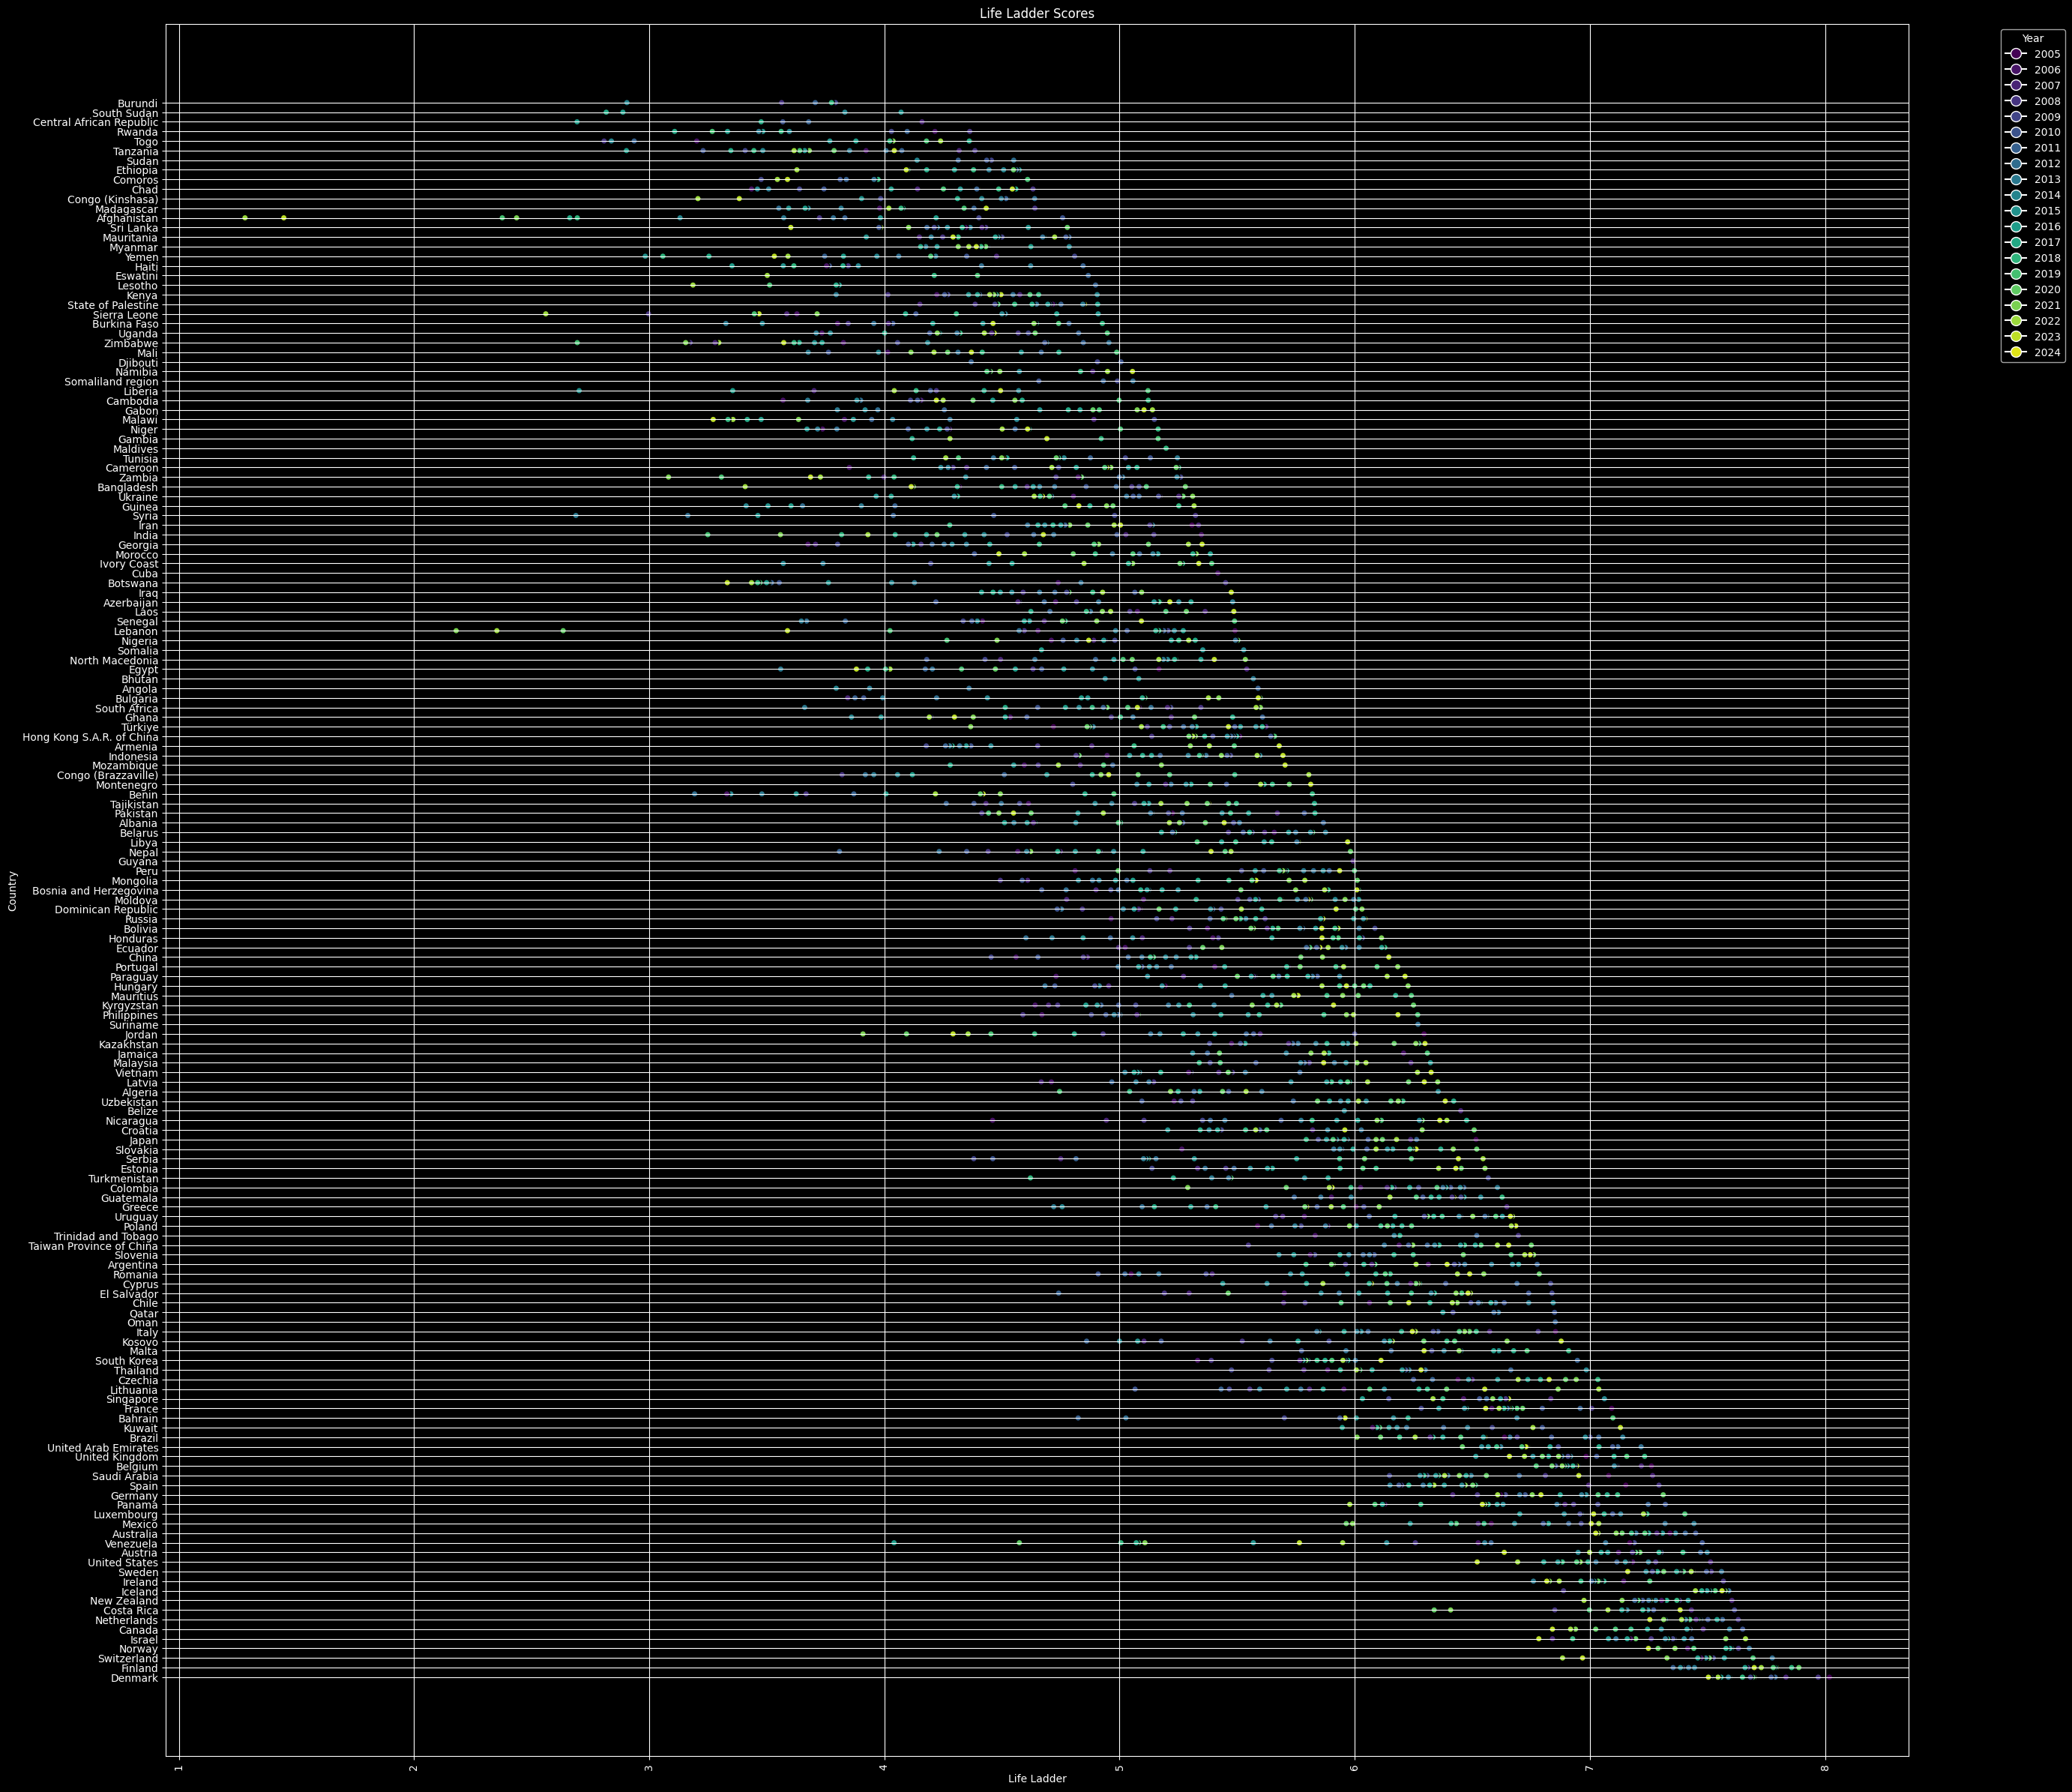

In [50]:
from matplotlib.lines import Line2D

df_sorted = df.sort_values(by="Life Ladder", ascending=False)
year_color_dict = {year: colors[i] for i, year in enumerate(years)}

plt.figure(figsize=(30, 30))

plt.scatter(df_sorted["Life Ladder"], df_sorted["Country name"],  c=df_sorted["year"].map(year_color_dict), cmap="viridis", alpha=1, edgecolors="black")
plt.xlabel("Life Ladder")
plt.ylabel("Country")
plt.title("Life Ladder Scores")
plt.grid()
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=str(year)) 
                   for year, color in year_color_dict.items()]
plt.xticks(rotation=90)

# Adding legend
plt.legend(handles=legend_elements, title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [51]:
years = list(range(2005, 2025))

# Viridis paletinden renkler al
cmap = plt.get_cmap("viridis")
colors = [cmap(i / len(years)) for i in range(len(years))]

# Yıl -> Renk sözlüğü
year_color_dict = {year: colors[i] for i, year in enumerate(years)}

# Sonuçları yazdır
print(year_color_dict)

{2005: (0.267004, 0.004874, 0.329415, 1.0), 2006: (0.280267, 0.073417, 0.397163, 1.0), 2007: (0.282623, 0.140926, 0.457517, 1.0), 2008: (0.273006, 0.20452, 0.501721, 1.0), 2009: (0.253935, 0.265254, 0.529983, 1.0), 2010: (0.229739, 0.322361, 0.545706, 1.0), 2011: (0.206756, 0.371758, 0.553117, 1.0), 2012: (0.183898, 0.422383, 0.556944, 1.0), 2013: (0.163625, 0.471133, 0.558148, 1.0), 2014: (0.144759, 0.519093, 0.556572, 1.0), 2015: (0.127568, 0.566949, 0.550556, 1.0), 2016: (0.119423, 0.611141, 0.538982, 1.0), 2017: (0.134692, 0.658636, 0.517649, 1.0), 2018: (0.185783, 0.704891, 0.485273, 1.0), 2019: (0.266941, 0.748751, 0.440573, 1.0), 2020: (0.369214, 0.788888, 0.382914, 1.0), 2021: (0.477504, 0.821444, 0.318195, 1.0), 2022: (0.606045, 0.850733, 0.236712, 1.0), 2023: (0.741388, 0.873449, 0.149561, 1.0), 2024: (0.876168, 0.891125, 0.09525, 1.0)}


### Aşağıdaki kod, farklı ülkelerin "Generosity" skorlarını scatter plot (dağılım grafiği) ile görselleştiriyor ve ülkeleri yıllara göre renklendiriyor.

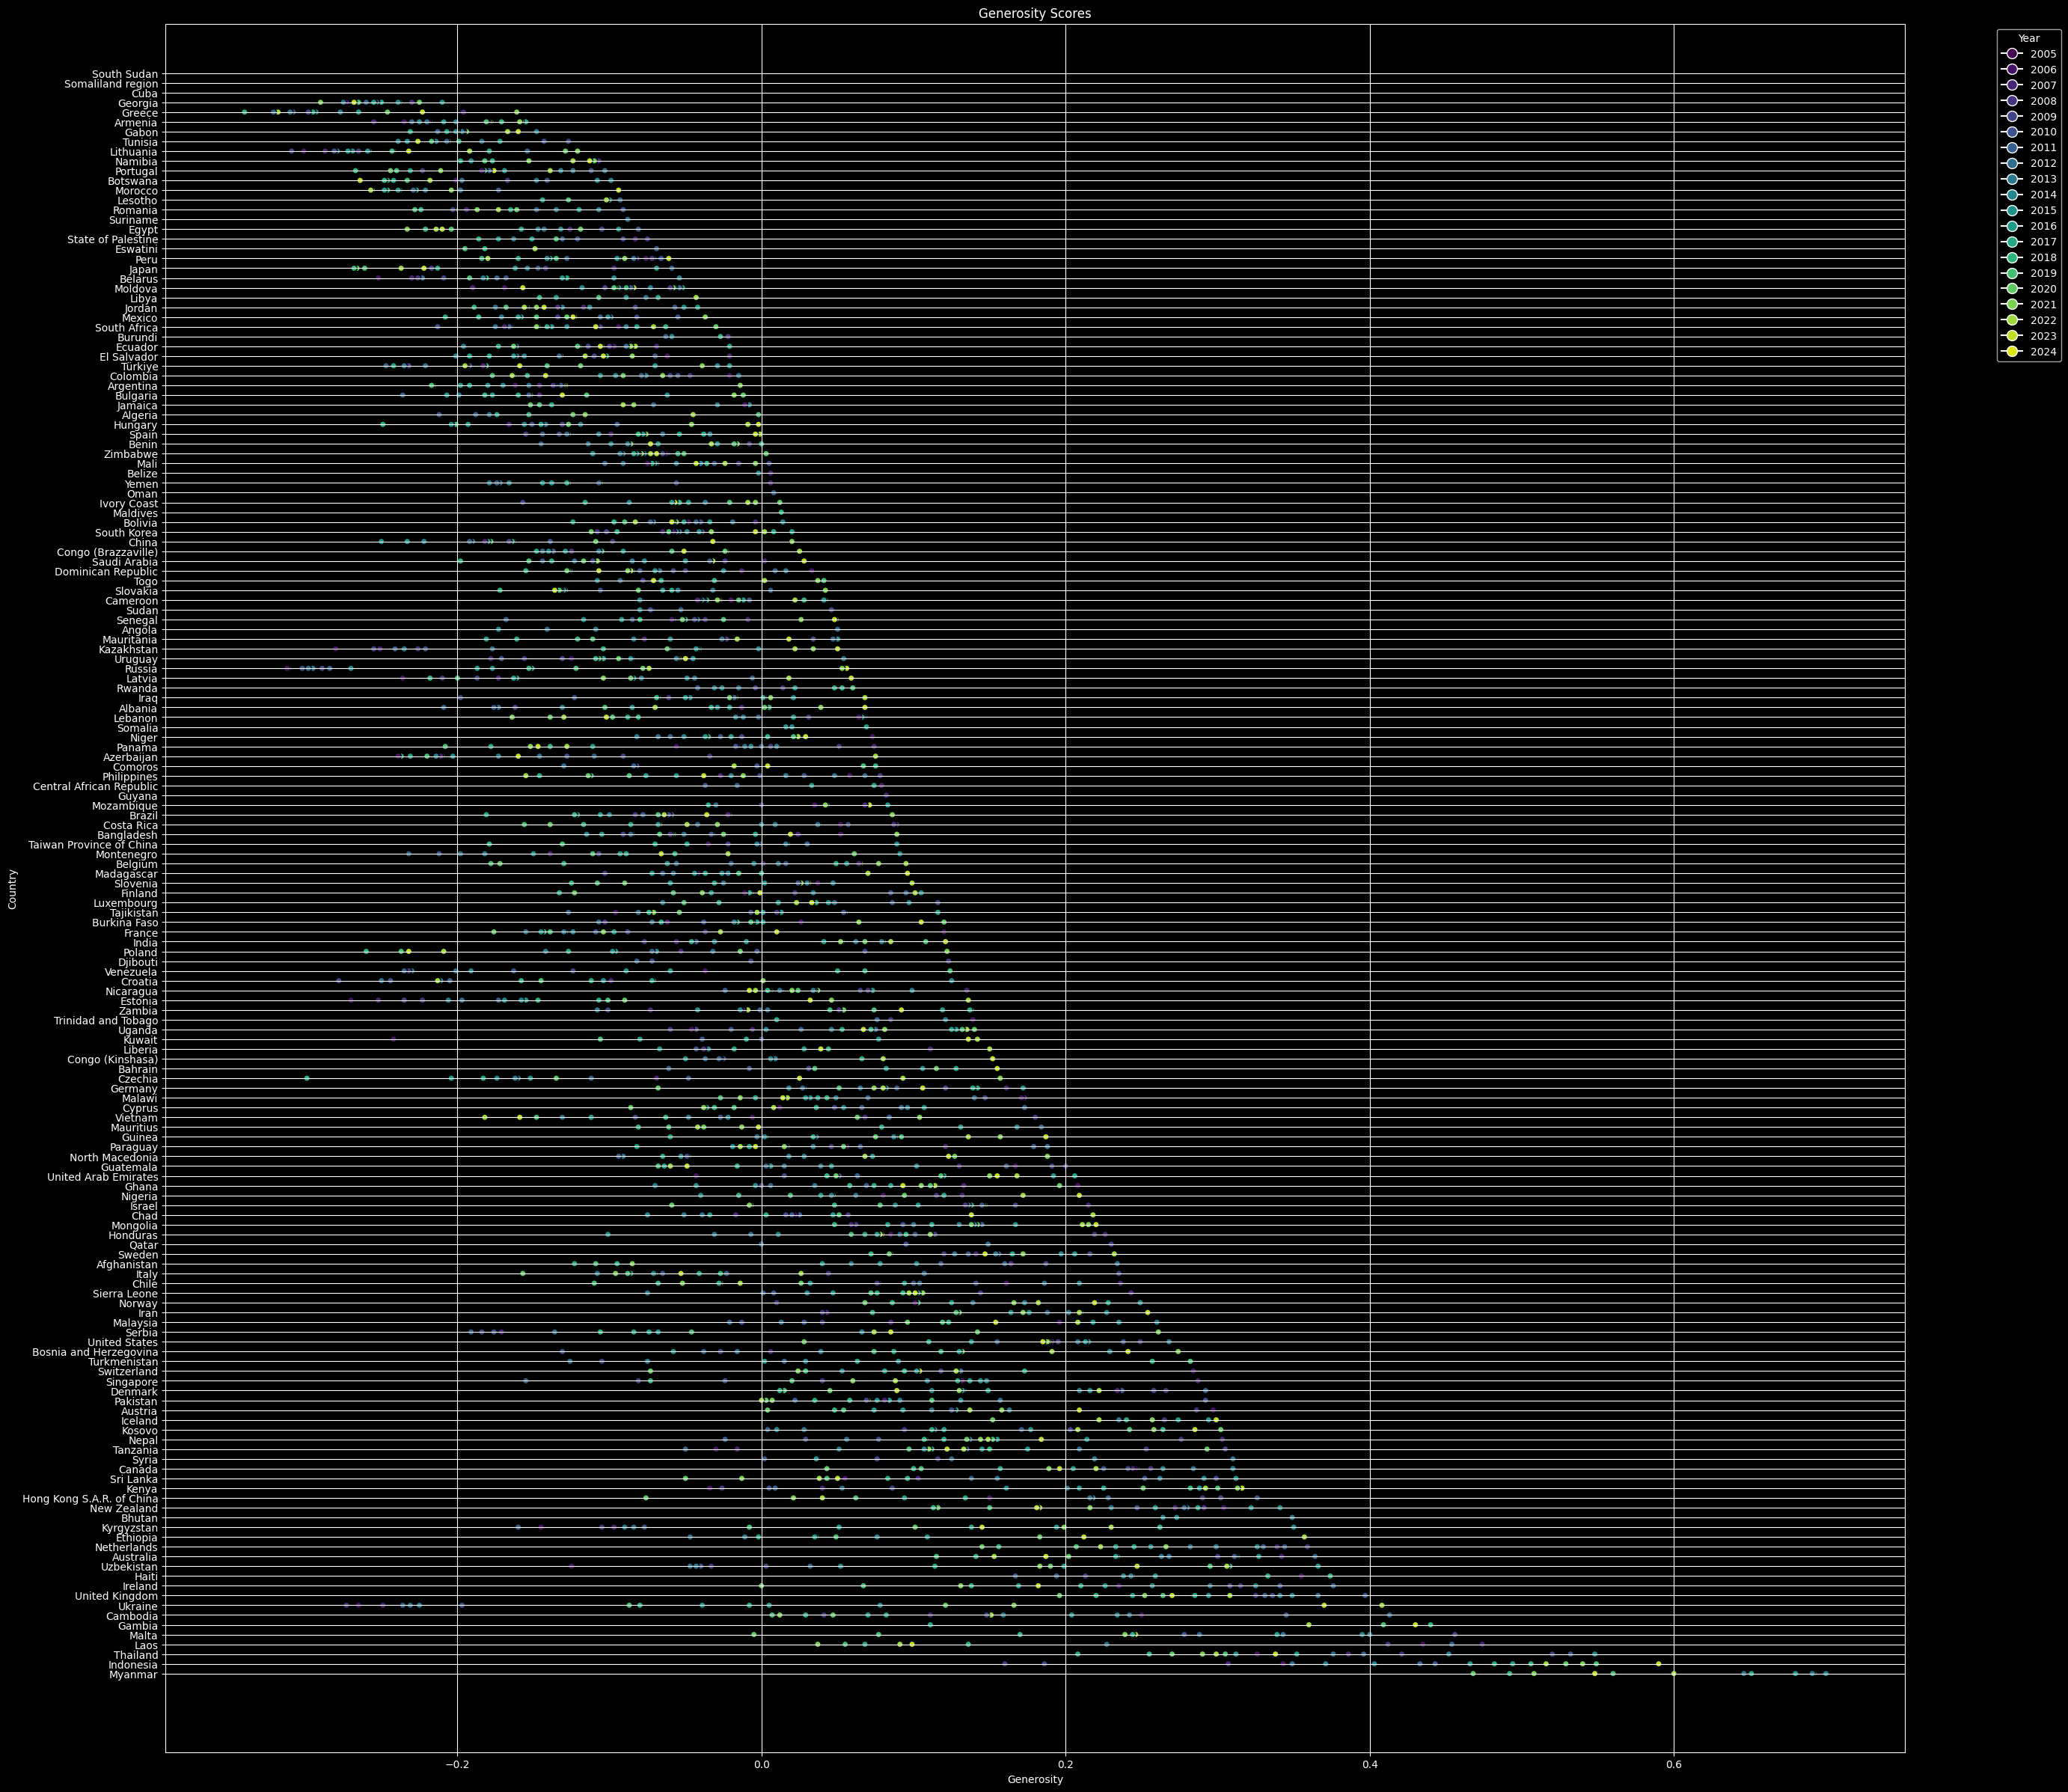

In [52]:
from matplotlib.lines import Line2D
df_sorte = df.sort_values(by = "Generosity",ascending = False)
plt.figure(figsize=(30, 30))
plt.scatter(df_sorte["Generosity"], df_sorte["Country name"],  c=df_sorte["year"].map(year_color_dict), cmap="viridis", alpha=1, edgecolors="black")
plt.xlabel("Generosity")
plt.ylabel("Country")
plt.title("Generosity Scores")
plt.grid()
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=str(year)) 
                   for year, color in year_color_dict.items()]

# Adding legend
plt.legend(handles=legend_elements, title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [53]:
df.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  2363.000000  2363.000000         2335.000000     2350.000000   
mean   2014.763860     5.483566            9.399671        0.809369   
std       5.059436     1.125522            1.152069        0.121212   
min    2005.000000     1.281000            5.527000        0.228000   
25%    2011.000000     4.647000            8.506500        0.744000   
50%    2015.000000     5.449000            9.503000        0.834500   
75%    2019.000000     6.323500           10.392500        0.904000   
max    2023.000000     8.019000           11.676000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2300.000000                   2327.000000   
mean                          63.401828                      0.750282   
std                            6.842644                      0.139357   
min                            6.720000                      0.228000   
25%                           59.195000                      0.661000   
50%                           65.100000                      0.771000   
75%                           68.552500                      0.862000   
max                           74.600000                      0.985000   

        Generosity  Perceptions of corruption  Positive affect  \
count  2282.000000                2238.000000      2339.000000   
mean      0.000098                   0.743971         0.651882   
std       0.161388                   0.184865         0.106240   
min      -0.340000                   0.035000         0.179000   
25%      -0.112000                   0.687000         0.572000   
50%      -0.022000                   0.798500         0.663000   
75%       0.093750                   0.867750         0.737000   
max       0.700000                   0.983000         0.884000   

       Negative affect  
count      2347.000000  
mean          0.273151  
std           0.087131  
min           0.083000  
25%           0.209000  
50%           0.262000  
75%           0.326000  
max           0.705000

## Variable Description¶

* Categorical Variable
* Numerical Variable

### A) Categorical Variable

"Country Name", "Year"

### Aşağıdaki kodda verilen bir değişkenin (kolonun) bar plot (çubuk grafik) ile görselleştirilmesini sağlıyor.

In [54]:
def bar_plot(vari):
    
    var = df[vari]

    varValue = var.value_counts()

    # for visualization

    plt.figure(figsize = (70,70))
    plt.bar(varValue.index, varValue)
    plt.xticks(rotation=90)

    plt.ylabel("Frequency")
    plt.title(vari)

    plt.xticks(varValue.index, varValue.index.values)
    plt.show()
    
    print("{}: \n {}".format(vari,varValue))

### Bu fonksiyon, df2 veri çerçevesindeki bir değişkenin frekans dağılımını çubuk grafikle görselleştirir.

In [55]:
def bar_plot_2(vari):
    
    var = df2[vari]

    varValue = var.value_counts()

    # for visualization

    plt.figure(figsize = (10,10))
    plt.bar(varValue.index, varValue)
    plt.xticks(rotation=90)

    plt.ylabel("Frequency")
    plt.title(vari)

    plt.xticks(varValue.index, varValue.index.values)
    plt.show()
    
    print("{}: \n {}".format(vari,varValue))

### Kodumuz "Regional indicator" kategorisinin değerlerinin frekans dağılımını bar_plot_2 fonksiyonunu kullanarak çubuk grafik ile görselleştirir.

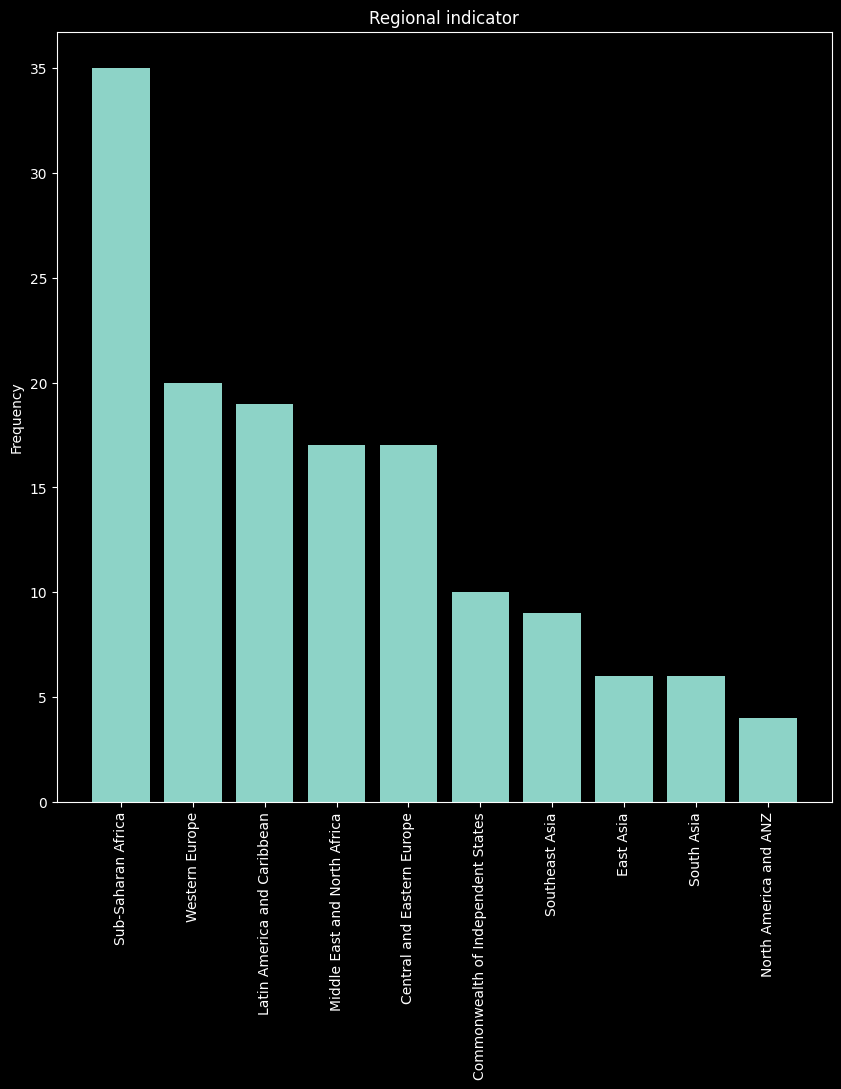

Regional indicator: 
 Regional indicator
Sub-Saharan Africa                    35
Western Europe                        20
Latin America and Caribbean           19
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    10
Southeast Asia                         9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Name: count, dtype: int64


In [56]:
category1 = ["Regional indicator"]
for c in category1:
    bar_plot_2(c)

### Kodumuz, "Regional indicator" ile "Ladder score" arasındaki ilişkiyi bir scatter plot (dağılım grafiği) ile görselleştirir. Grafik, her bir bölge için Life Ladder skorunu gösteren noktalardan oluşur.

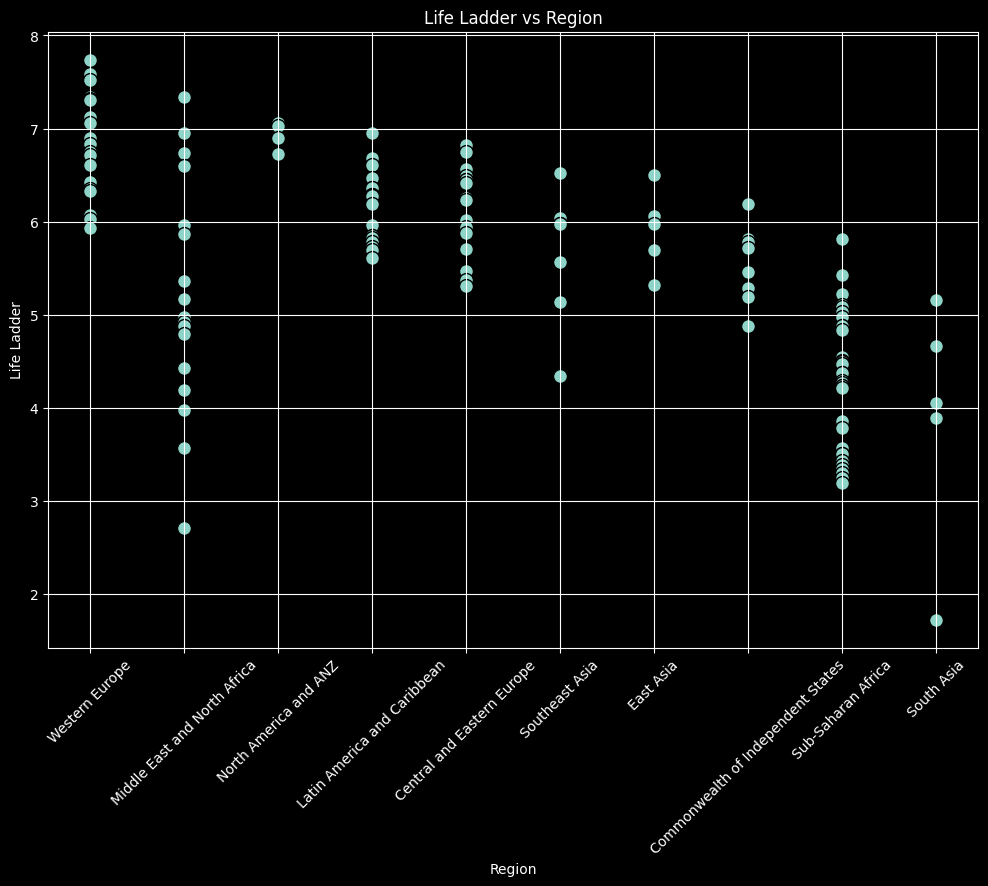

In [57]:
# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df2["Regional indicator"], df2["Ladder score"], alpha=1, edgecolors="black", s=100)  # s parametresi ile boyut ayarı

# Eksen etiketleri ve başlık
plt.xlabel("Region")
plt.ylabel("Life Ladder")
plt.title("Life Ladder vs Region")

# X eksenindeki etiketleri döndür
plt.xticks(rotation=45)

# Grafik göster
plt.grid(True)
plt.show()


### B) Numerical Variable

### Aşağıdaki fonksiyon, verilen bir değişkenin dağılımını bir violin plot ile görselleştirir.

In [58]:
def plot_violin(vari):
    plt.figure(figsize = (12,8))
    
    # Violin plot çiz
    sns.violinplot(x=df[vari], inner="stick", linewidth=1.5)
        
    # Eksen etiketleri ve başlık
    plt.xticks(rotation=90)
    plt.xlabel(vari)
    plt.ylabel("Density")
    plt.title("{} distribution with violin plot and KDE".format(vari))
    
    # Grafik göster
    plt.show()


### Df'nin yıllara göre violinplot ile gösterimleri

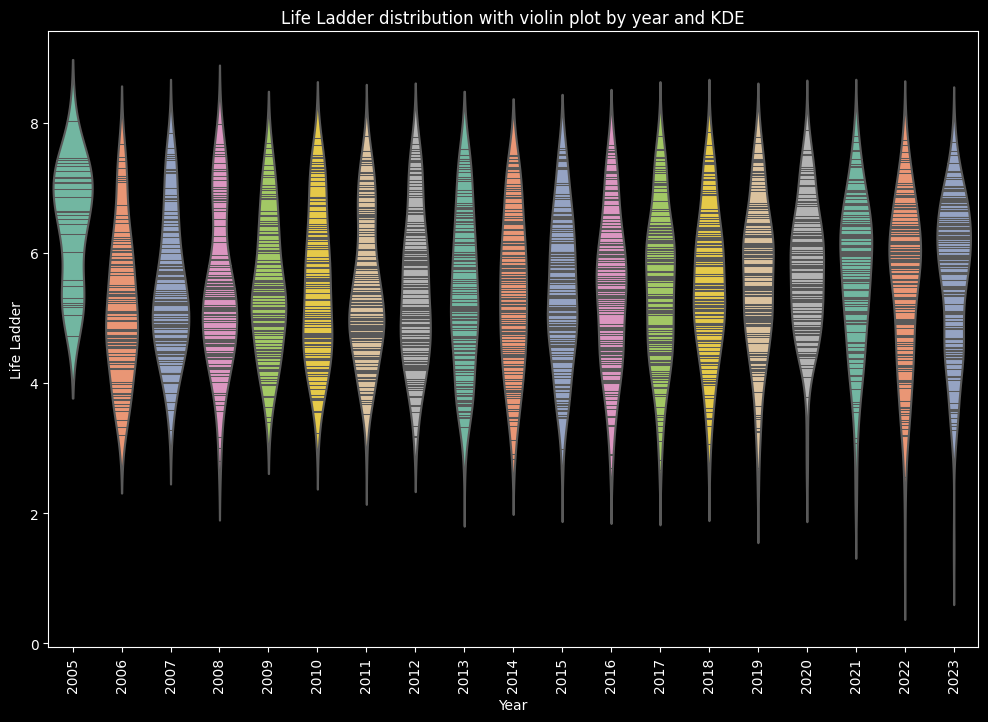

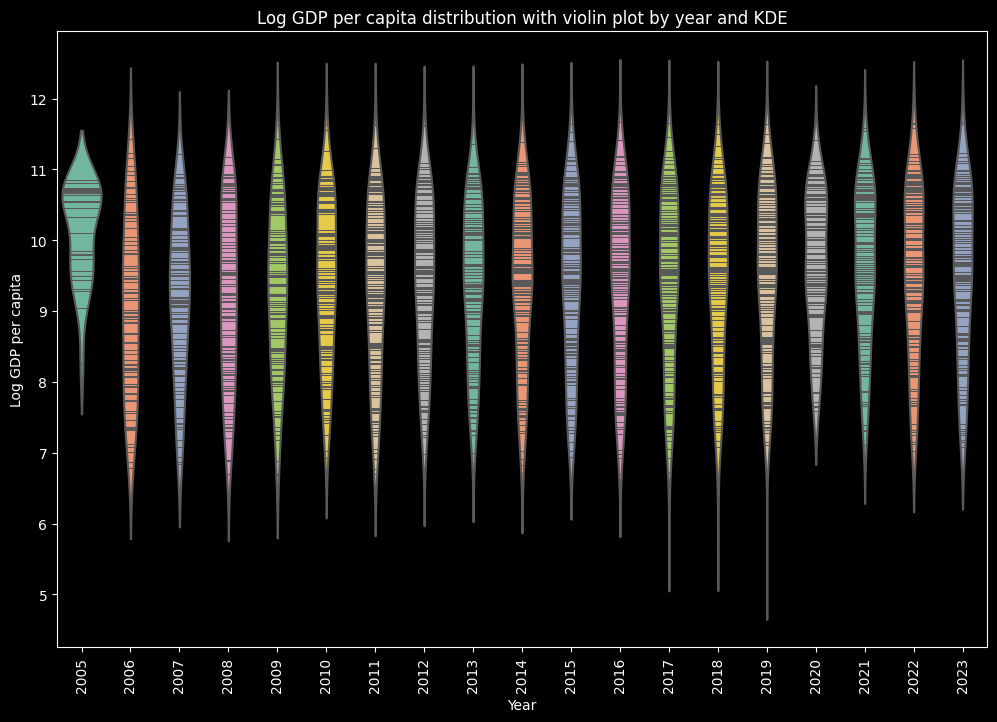

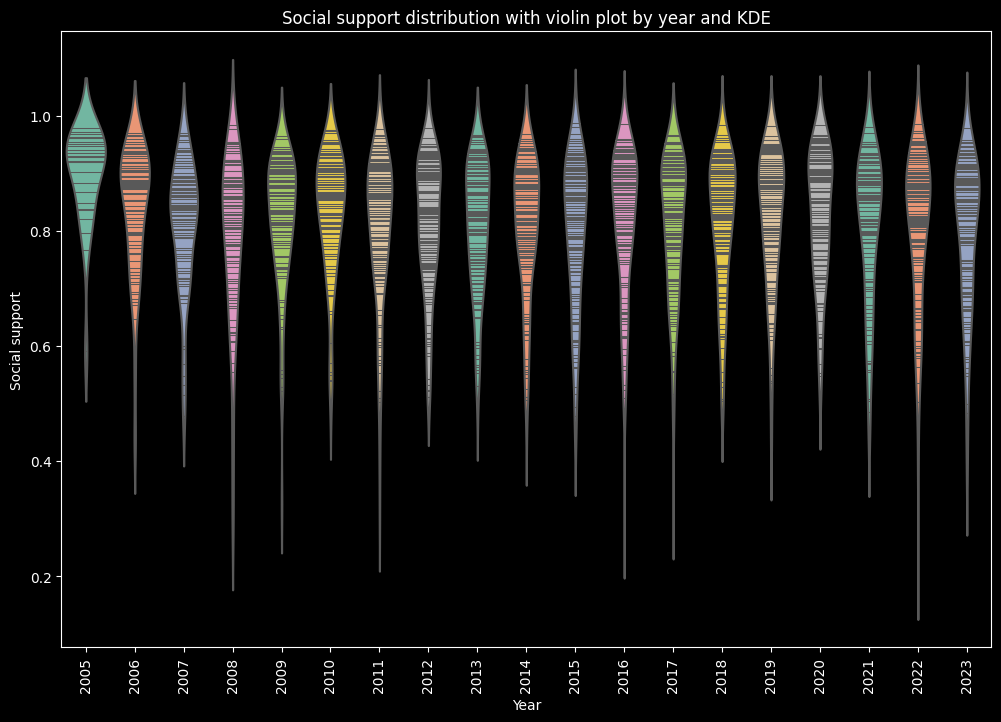

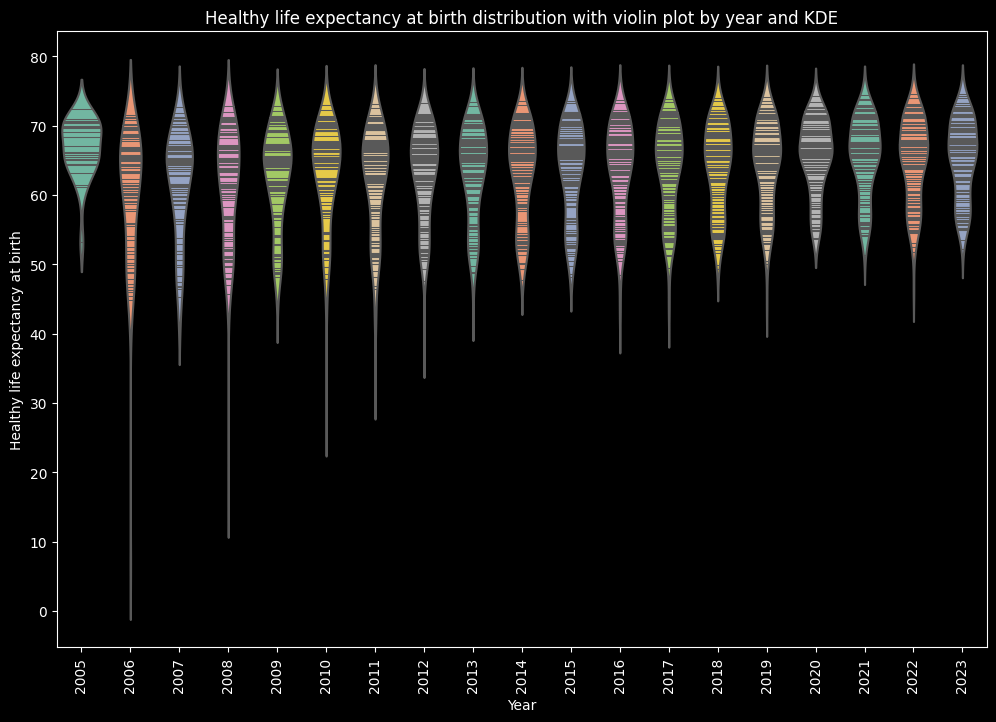

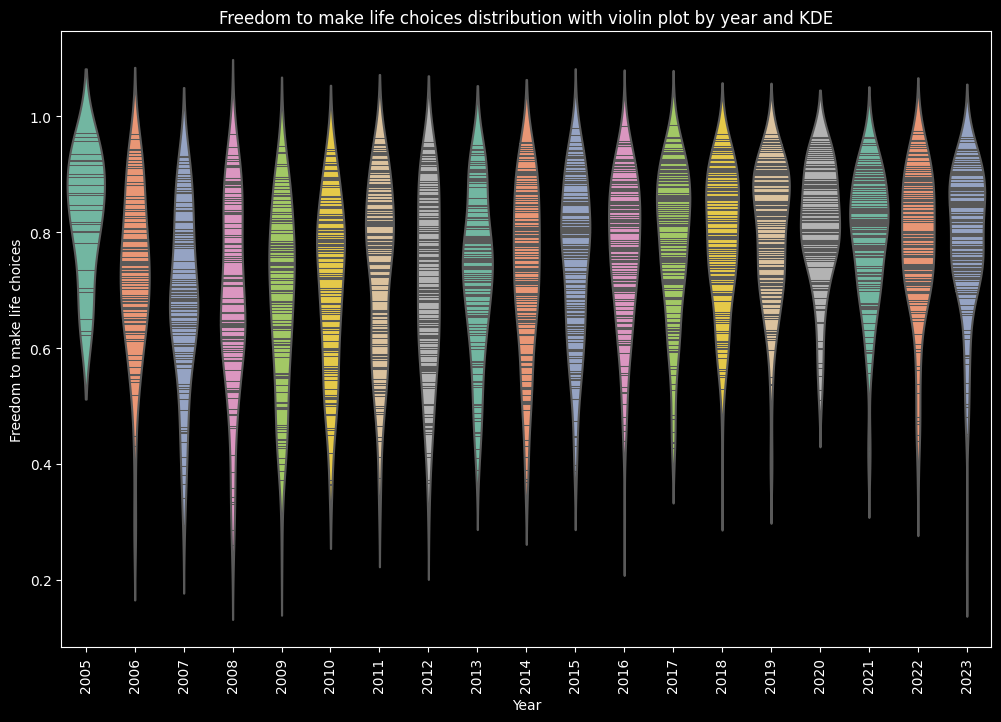

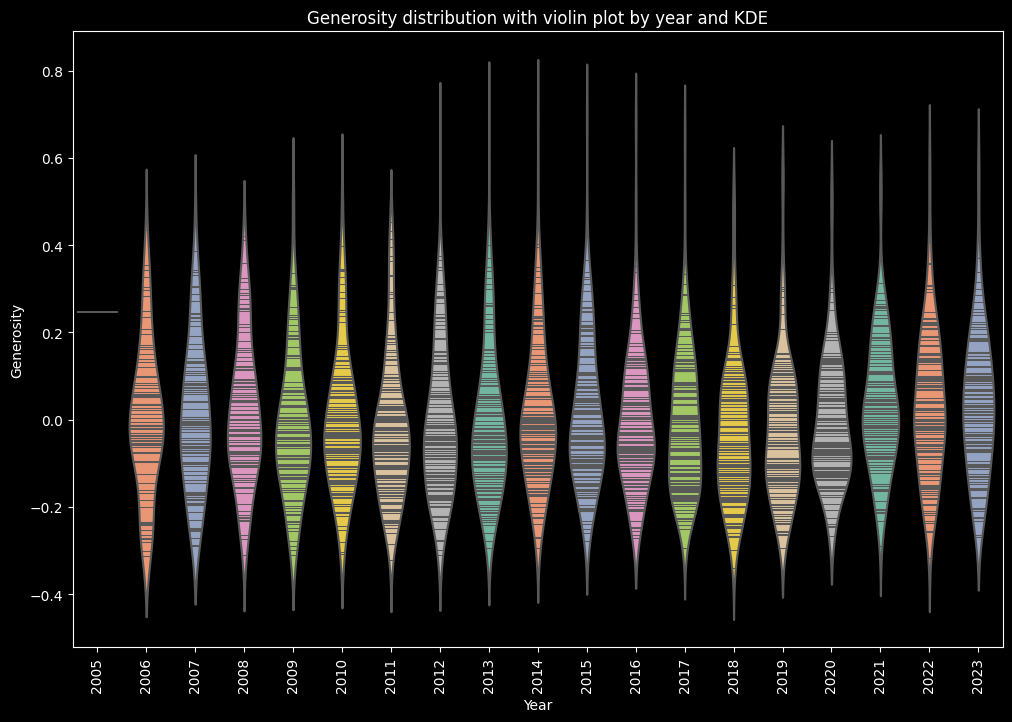

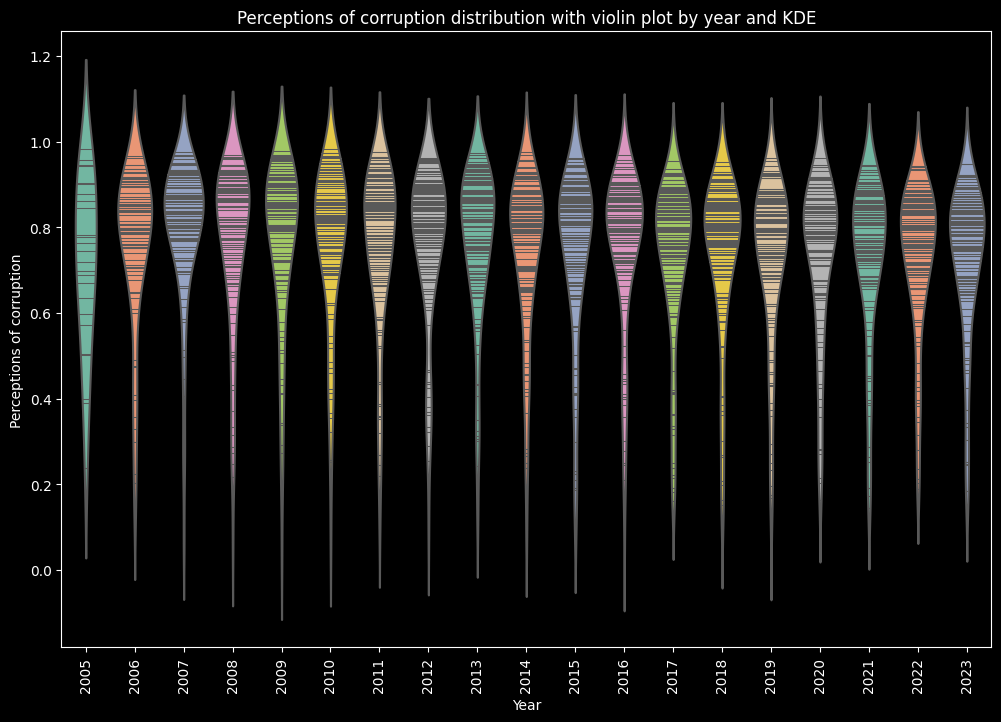

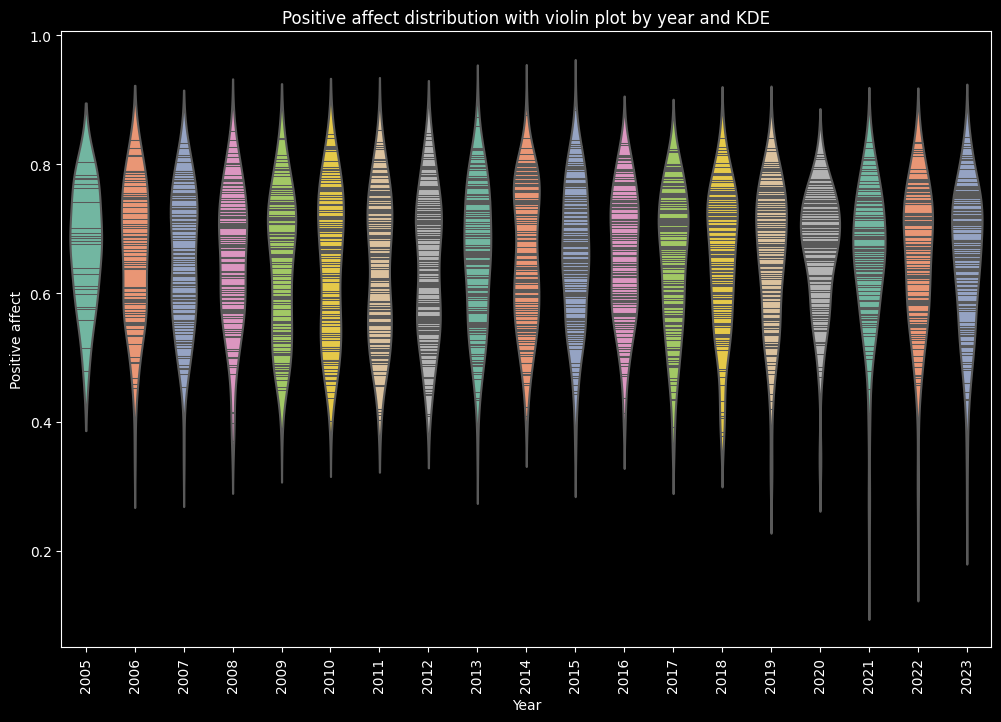

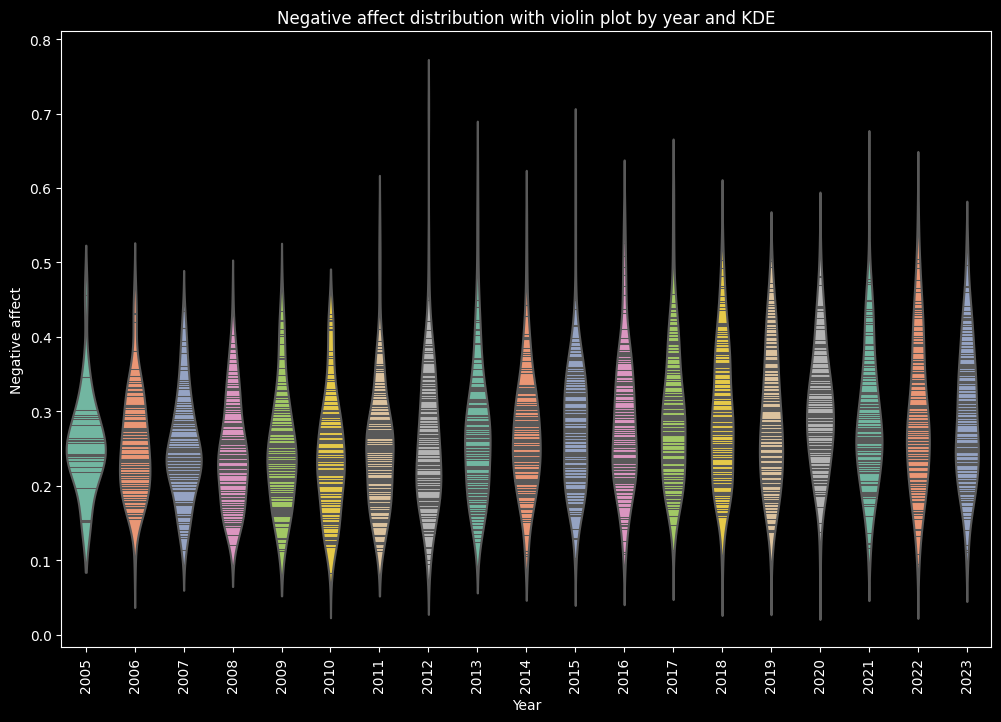

In [59]:
numVar = ["Life Ladder", "Log GDP per capita",
       "Social support", "Healthy life expectancy at birth",
       "Freedom to make life choices", "Generosity",
       "Perceptions of corruption", "Positive affect", "Negative affect"]

def plot_violin_with_year(vari):
    plt.figure(figsize=(12, 8))
    
    # Year bazında veri gruplandırılarak violin plot çizildi
    sns.violinplot(x='year', y=vari, data=df, palette='Set2', inner="stick", linewidth=1.5)
        
    # Eksen etiketleri ve başlık
    plt.xticks(rotation=90)
    plt.xlabel("Year")
    plt.ylabel(vari)
    plt.title("{} distribution with violin plot by year and KDE".format(vari))
    
    # Grafik göster
    plt.show()

# Her bir numVar için fonksiyonu çağır
for v in numVar:
    plot_violin_with_year(v)


### Yukarıdaki boxplotlara bakarak hangi yıllarda daha çok outlier oluştuğu ve değişkenlerin dağılımlarının yorumlamalarını yapabiliriz.

## Df'nin violinplot ve boxplot ile gösterimi

### plot_violin fonksiyonu ile her bir değişkenin dağılımını violin plot ile görselleştirir.
### df.boxplot(column=b, by="year", rot=90) satırı, box plot çizimi yaparak her bir yıl için b sütunundaki verilerin dağılımını gösterir.

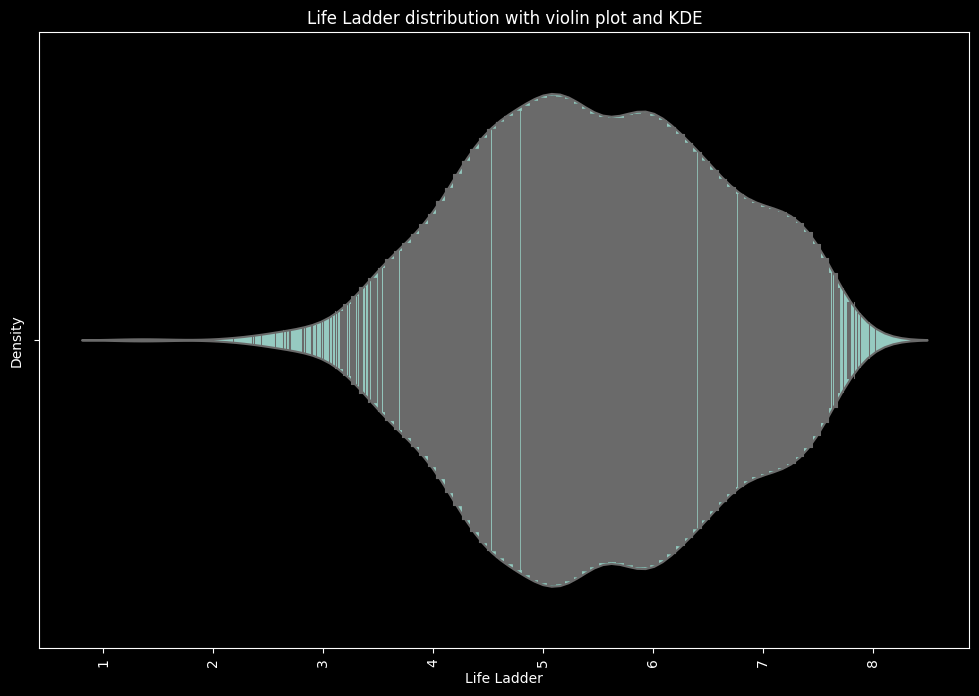

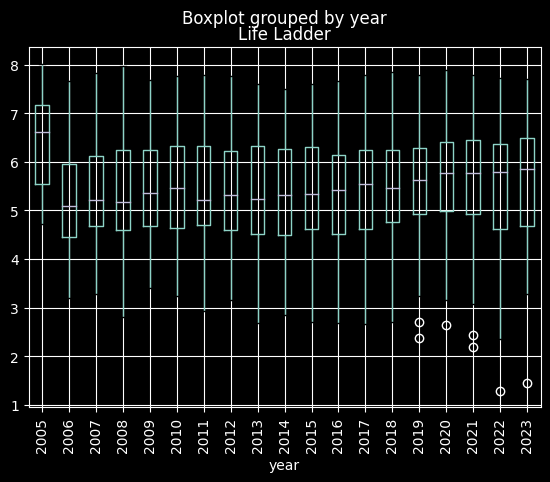

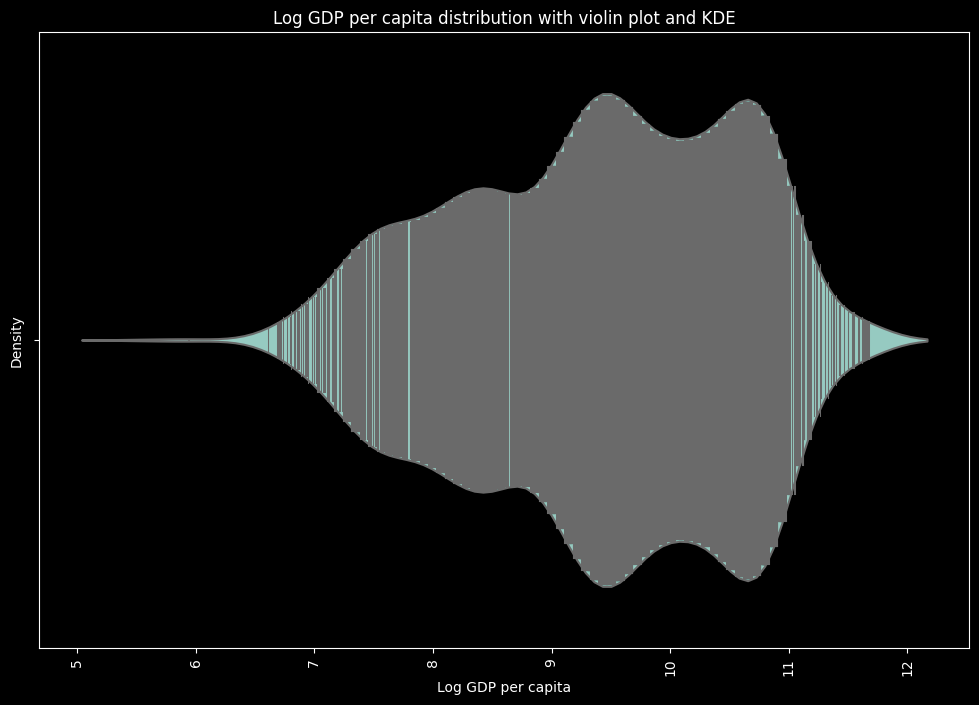

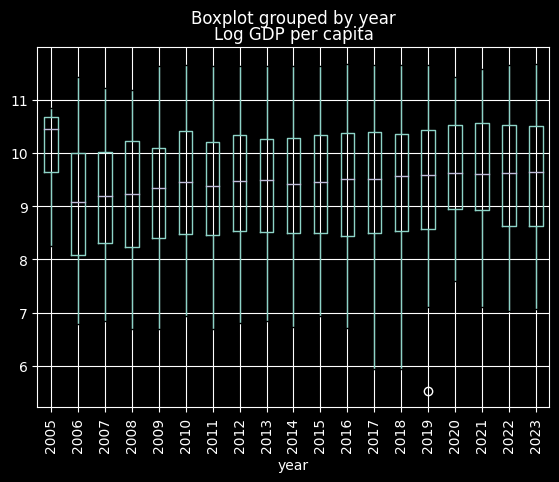

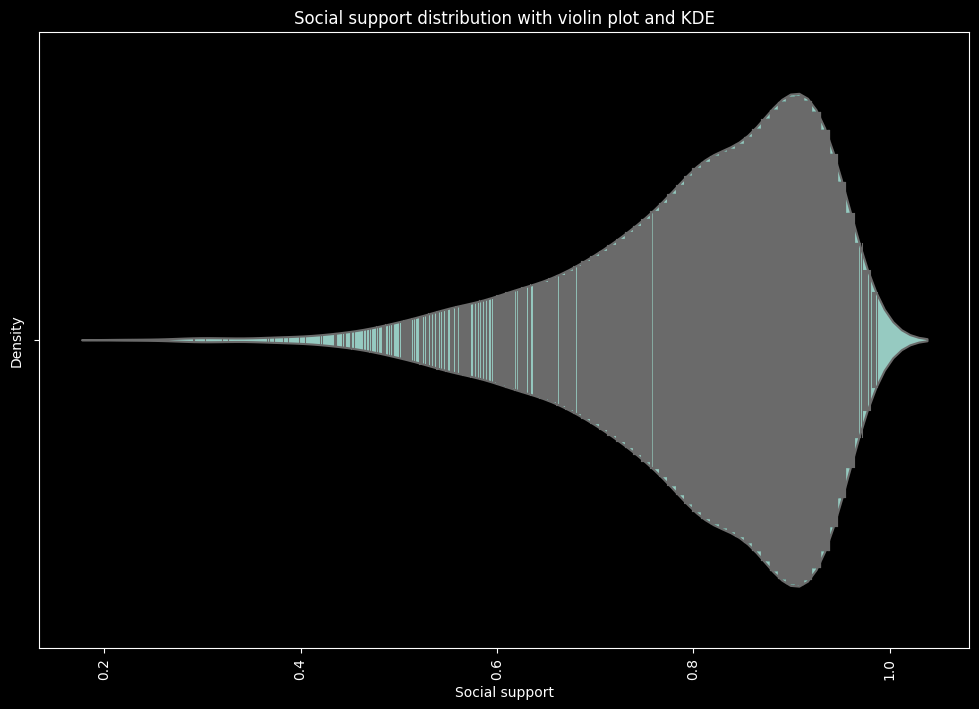

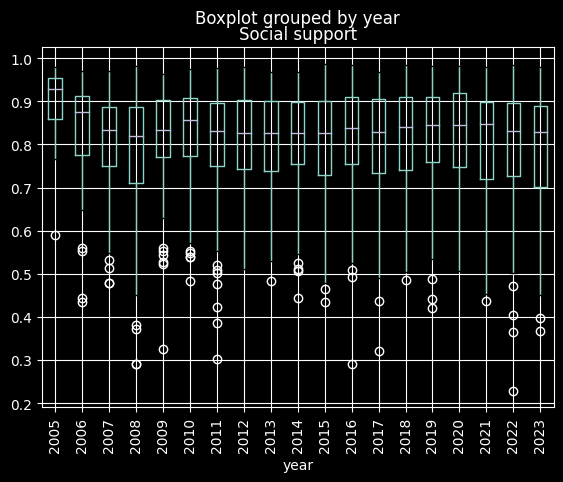

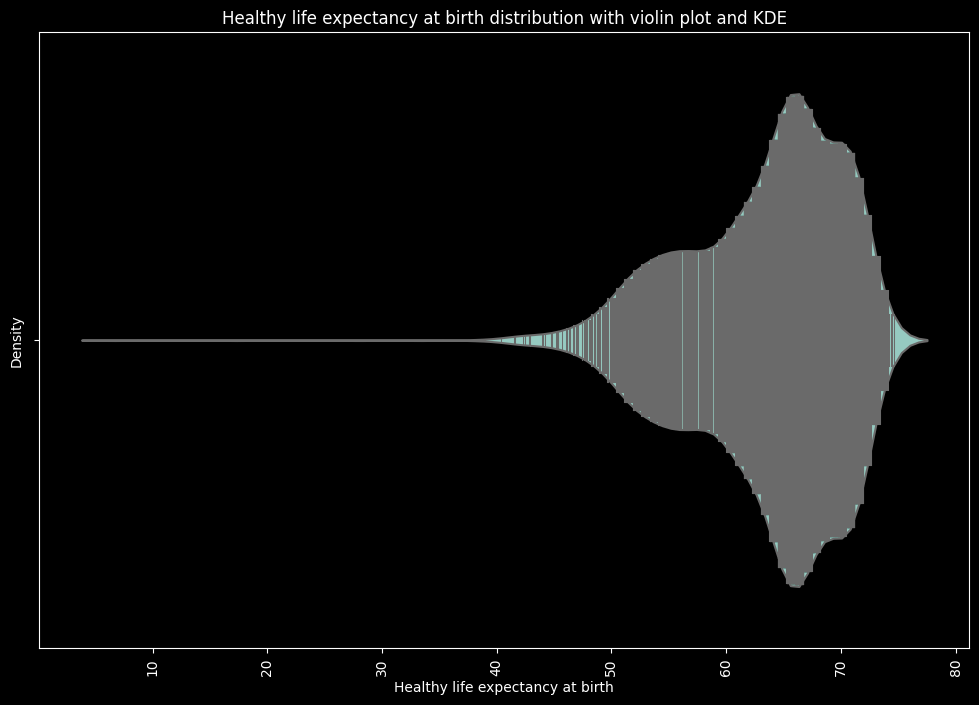

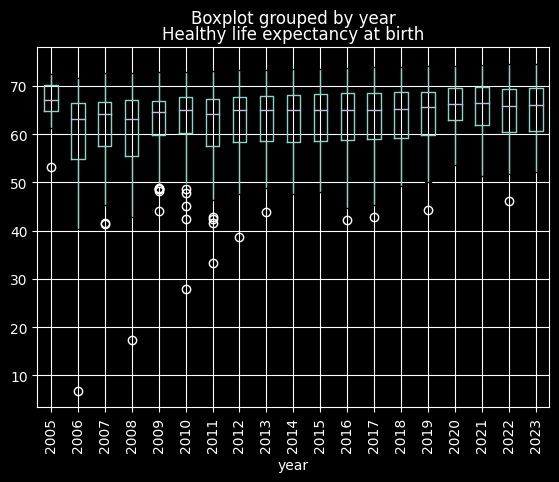

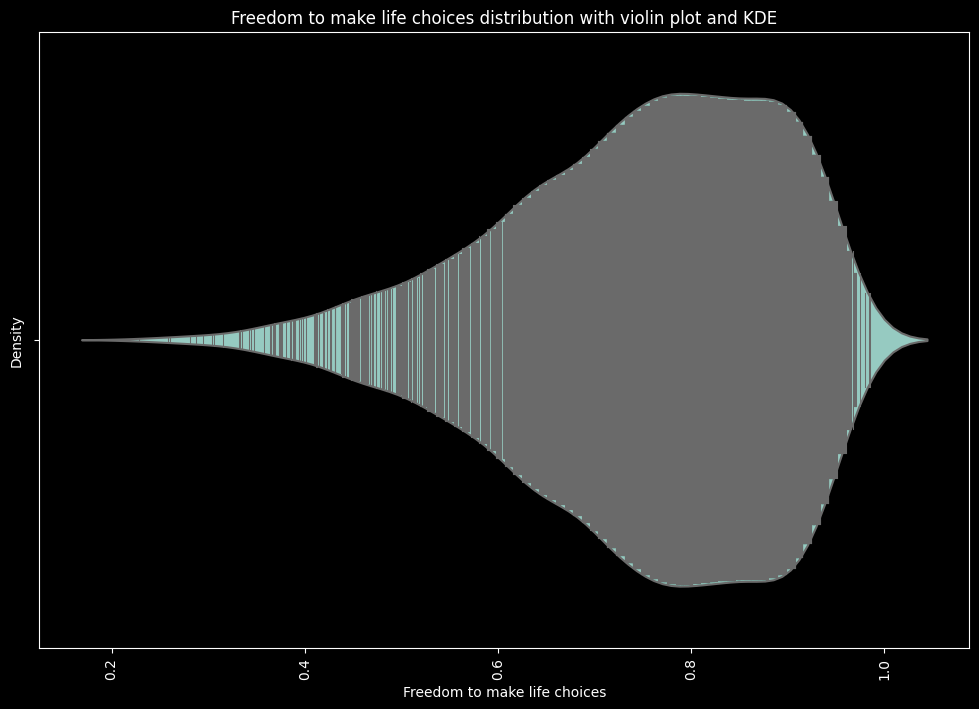

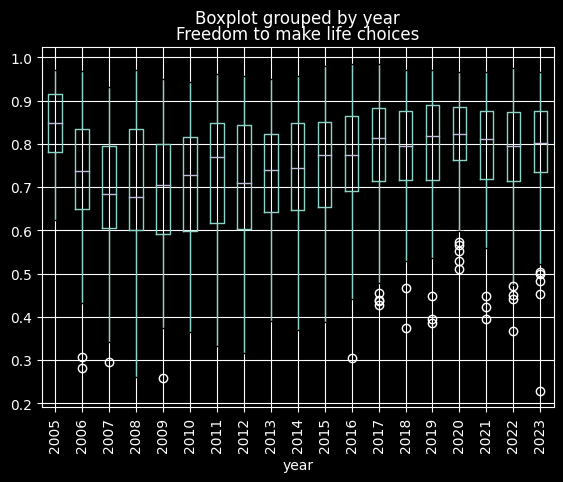

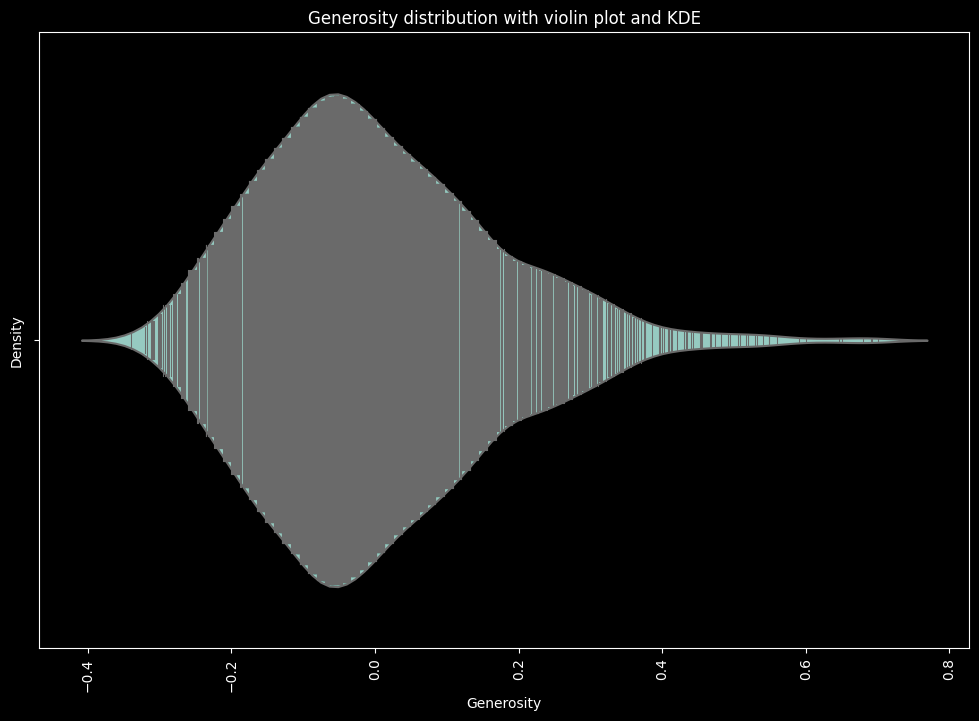

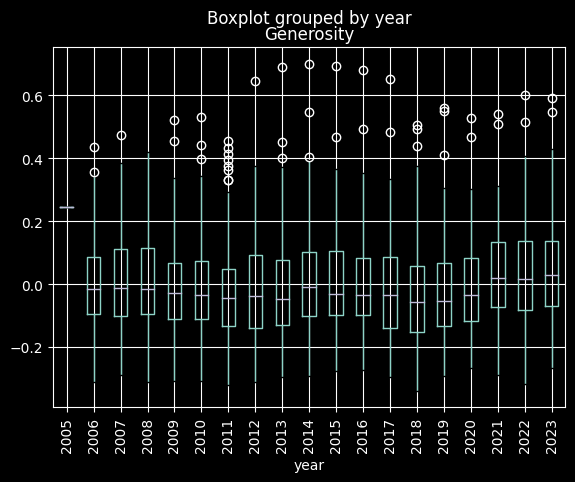

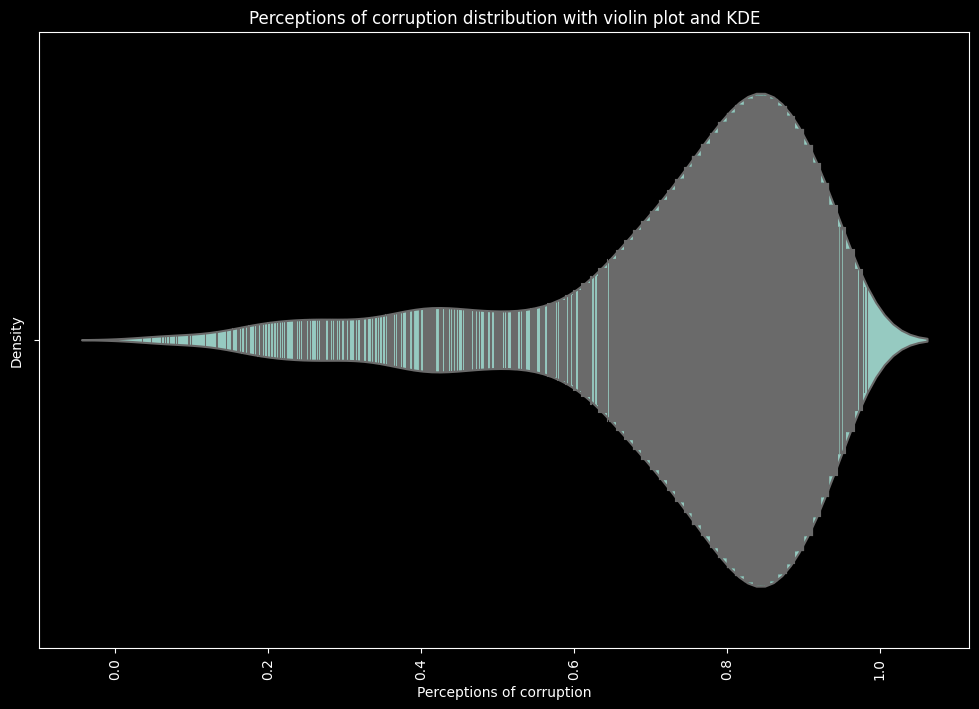

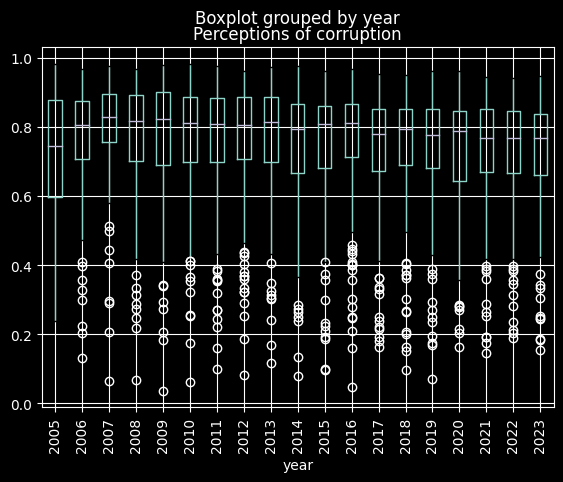

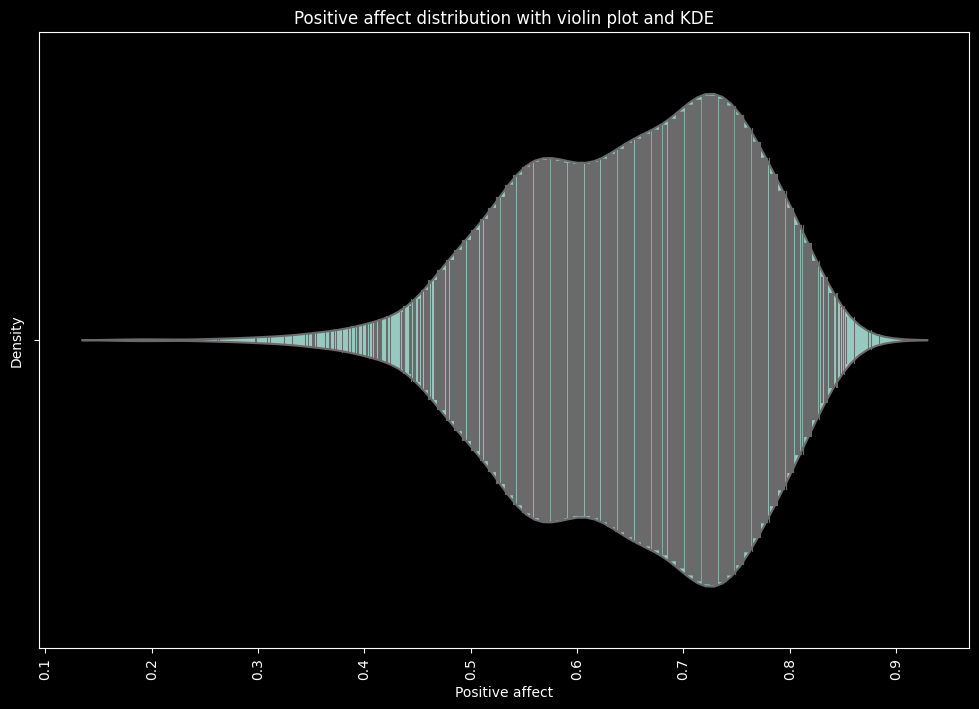

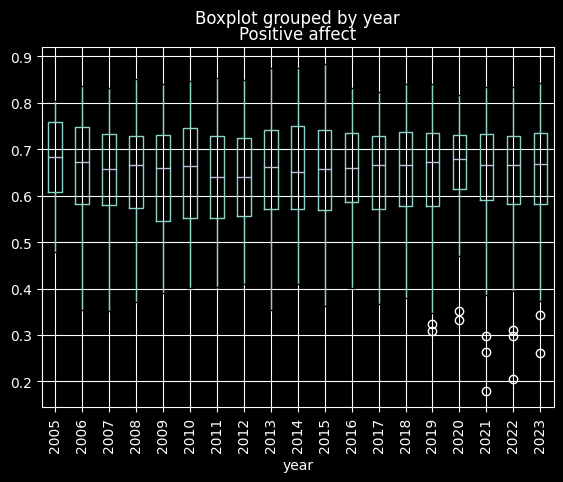

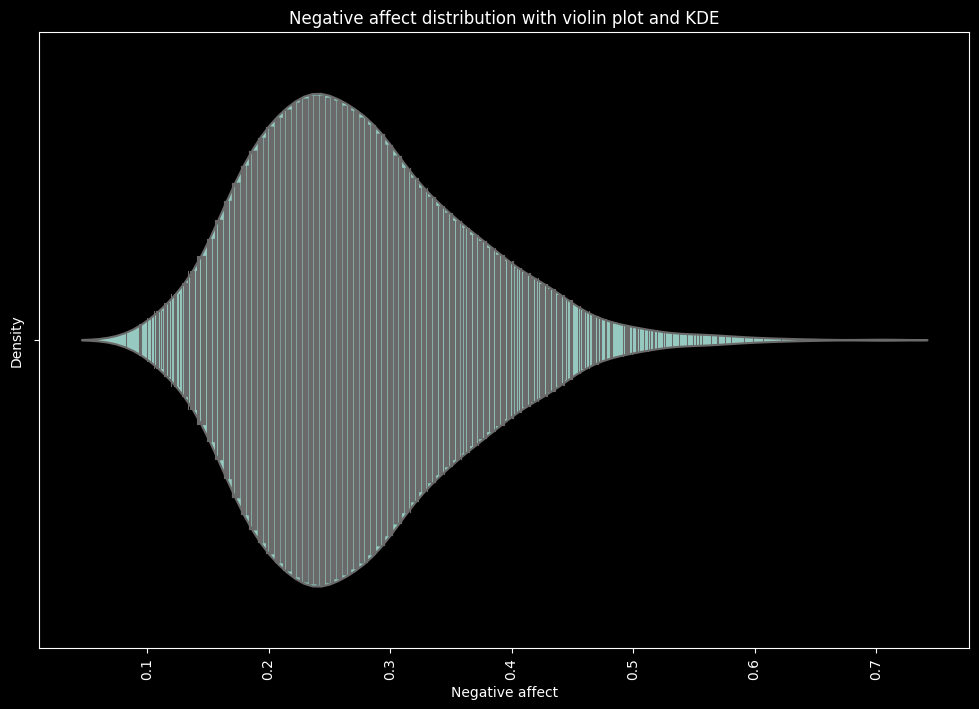

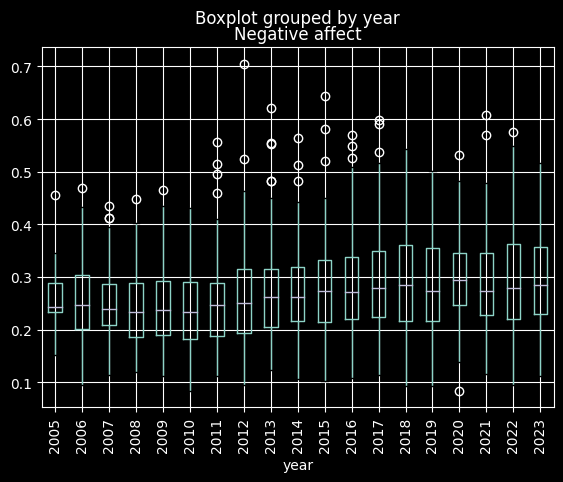

In [87]:
numVar = ["Life Ladder", "Log GDP per capita",
       "Social support", "Healthy life expectancy at birth",
       "Freedom to make life choices", "Generosity",
       "Perceptions of corruption", "Positive affect", "Negative affect"]

for v in numVar:
    plot_violin(v)
    df.boxplot(column=v, by="year", rot=90)

### Df'deki ülkelerin isimleri

In [93]:
df["Country name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 

### Veri setindeki ülkelerin sayısı

In [89]:
df["Country name"].nunique()

165

In [90]:
df["Country name"].value_counts()

Country name
Lebanon      18
Jordan       18
Nicaragua    18
Nepal        18
Moldova      18
             ..
Cuba          1
Suriname      1
Guyana        1
Oman          1
Maldives      1
Name: count, Length: 165, dtype: int64

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [64]:
len(df.index)

2363

#### The country with the largest value of life ladders

In [65]:
df[df["Life Ladder"].max() == df["Life Ladder"]]

Country name  year  Life Ladder  Log GDP per capita  Social support  \
539      Denmark  2005        8.019              10.849           0.972   

     Healthy life expectancy at birth  Freedom to make life choices  \
539                              68.3                         0.971   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  
539         NaN                      0.237            0.777            0.154

#### The country's social support value with the largest value of life ladders

In [66]:
df[df["Life Ladder"].max() == df["Life Ladder"]]["Social support"]

539    0.972
Name: Social support, dtype: float64

#### The country with the smallest value of life ladders

In [67]:
df[df["Life Ladder"].min() == df["Life Ladder"]]

Country name  year  Life Ladder  Log GDP per capita  Social support  \
13  Afghanistan  2022        1.281                 NaN           0.228   

    Healthy life expectancy at birth  Freedom to make life choices  \
13                            54.875                         0.368   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  
13         NaN                      0.733            0.206            0.576

#### The country's social support value with the smallest value of life ladders

In [68]:
df[df["Life Ladder"].min() == df["Life Ladder"]]["Social support"].mean()

0.228

### Aşağıdaki kod Türkiye verisini filtreleyerek her yıl için bir violin plot çizen fonksiyondur.
### Veriler yıllara göre gruplandırılarak görselleştirilir.

Not: Veriler başka plotlarla gösterilebilirdi fakat öğrenmek adına ben violinplot kullandım.

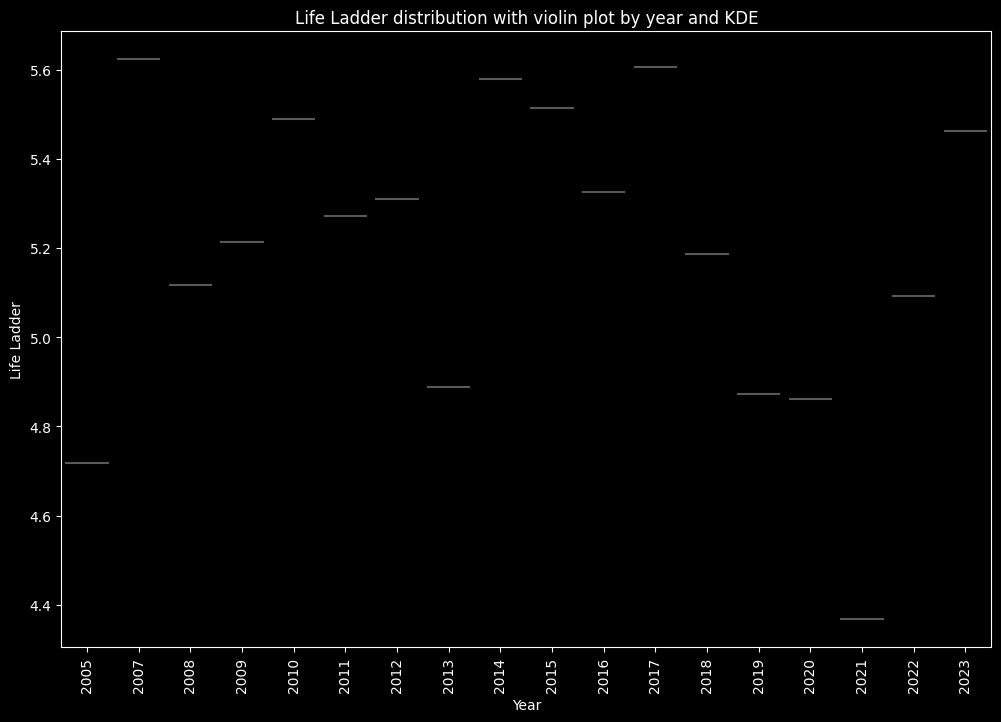

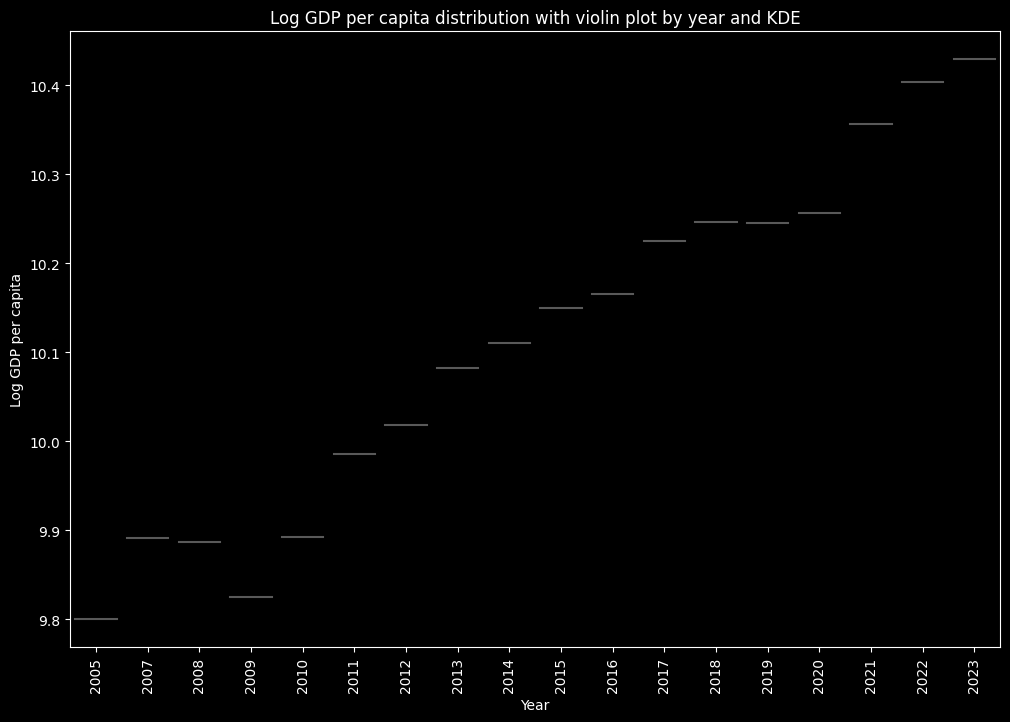

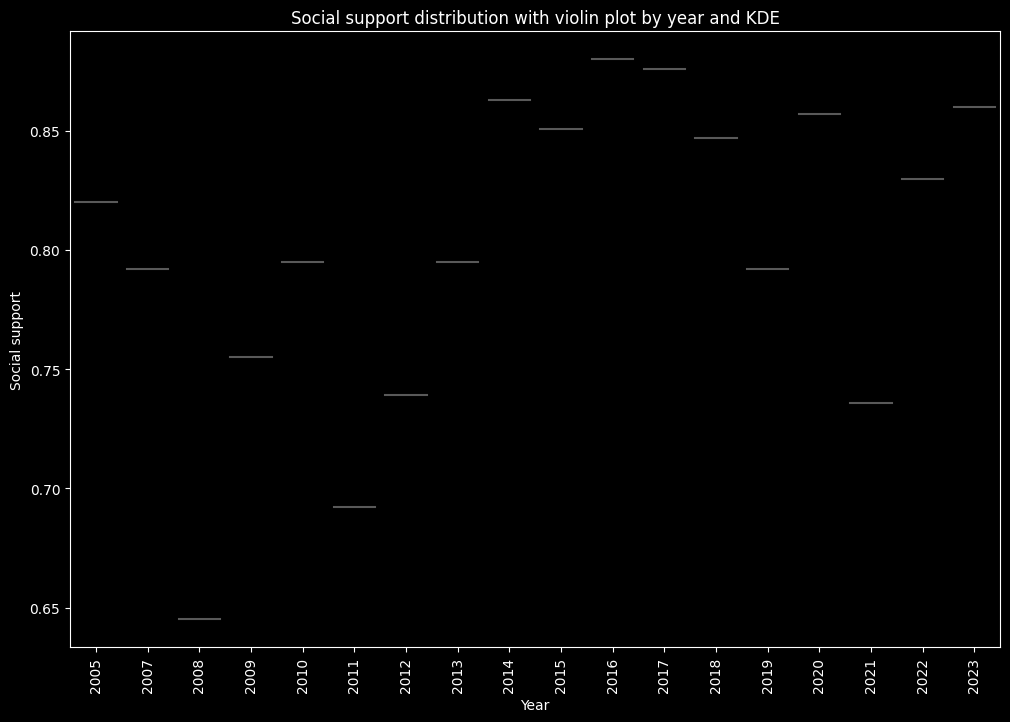

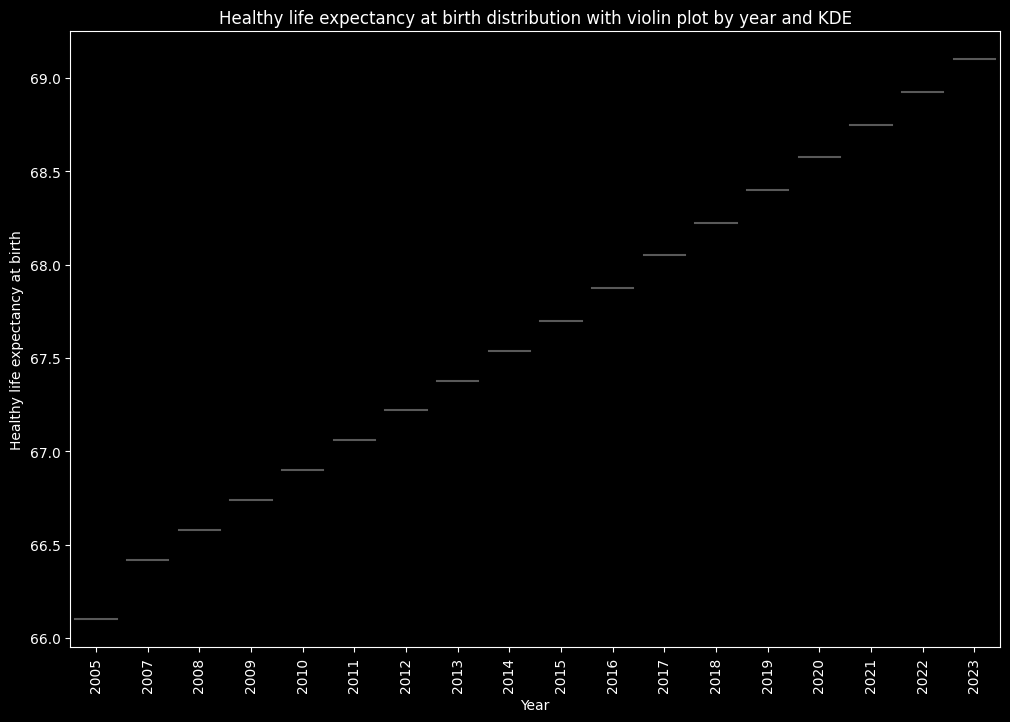

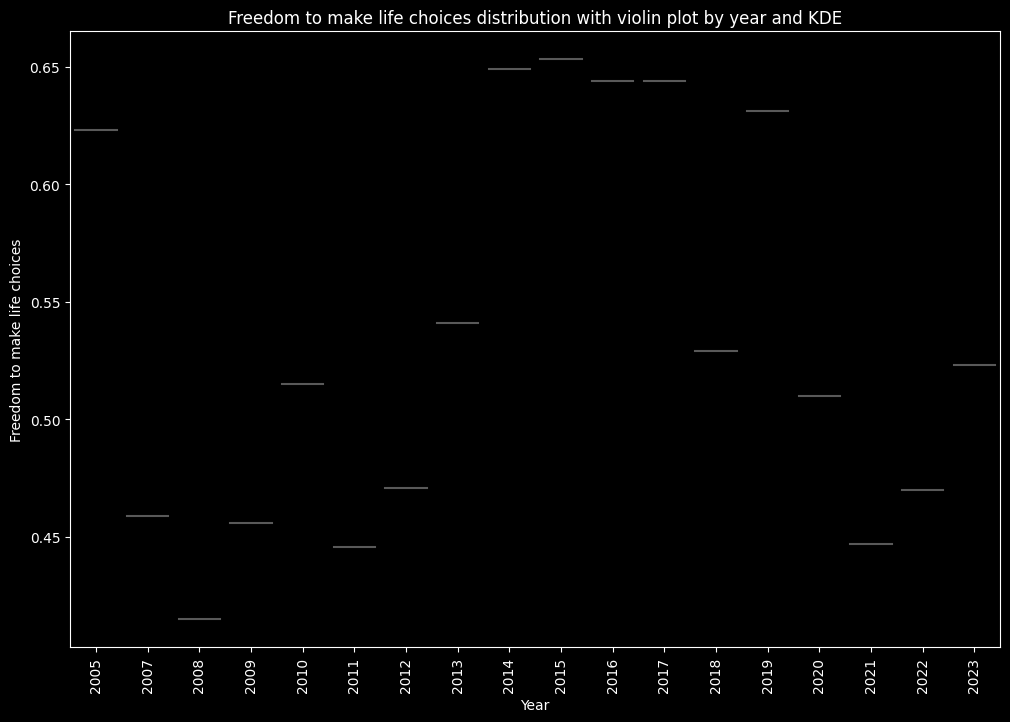

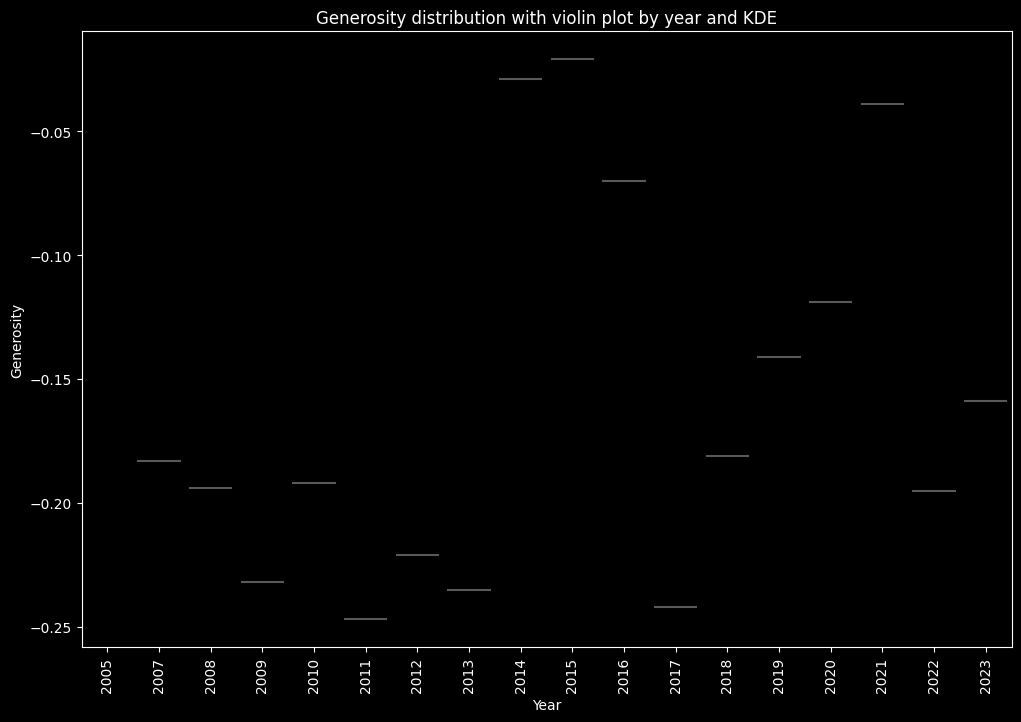

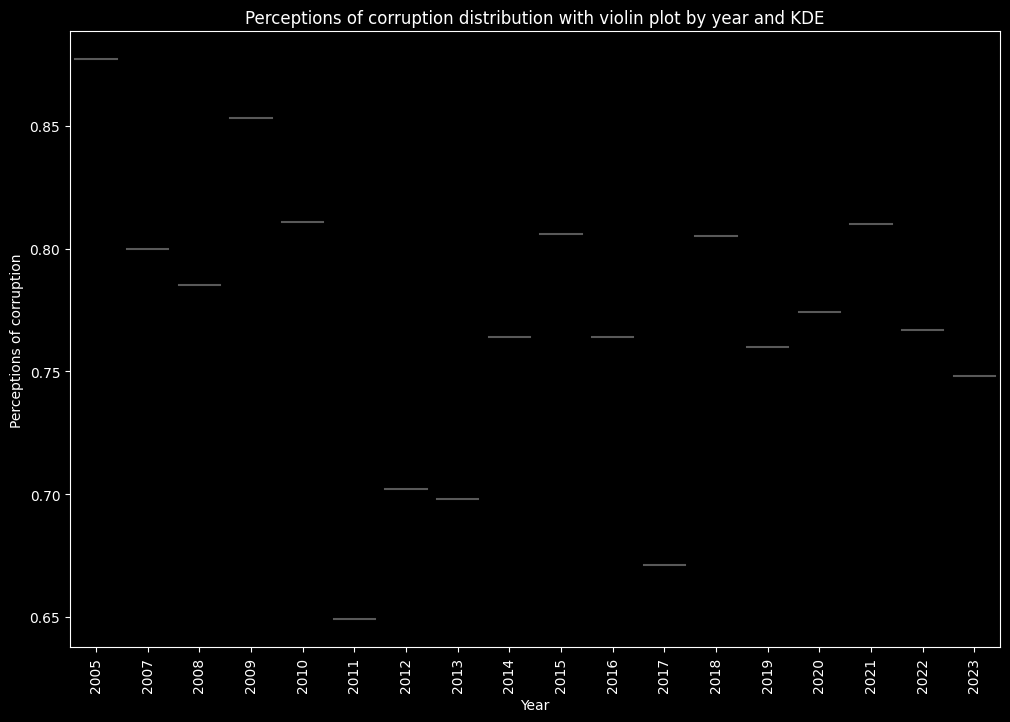

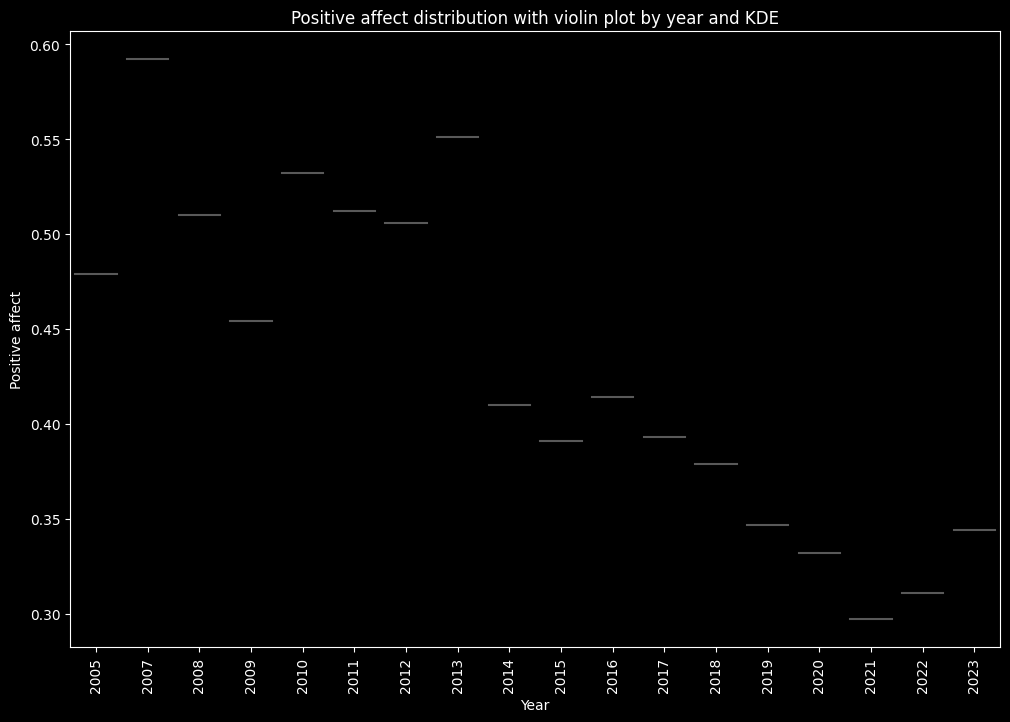

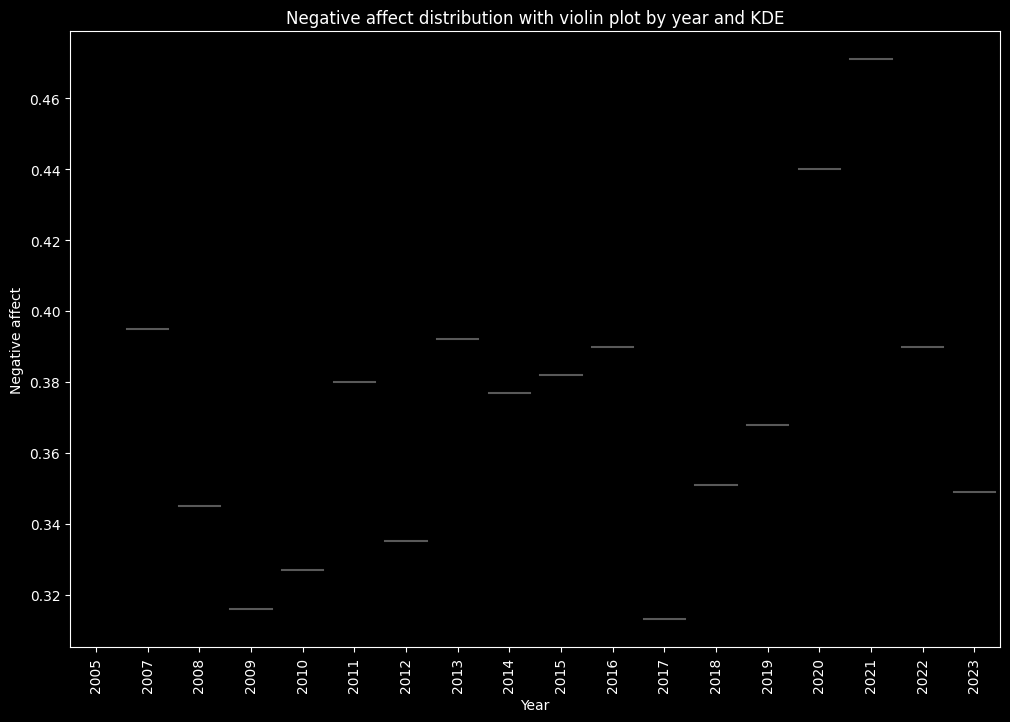

In [69]:
df_tr = df[df["Country name"] == "Türkiye"]

def plot_violin_with_year_turkiye(vari):
    plt.figure(figsize=(12, 8))
    
    # Year bazında veri gruplandırılarak violin plot çizildi
    sns.violinplot(x='year', y=vari, data=df_tr, palette='Set2', inner="stick", linewidth=1.5)
        
    # Eksen etiketleri ve başlık
    plt.xticks(rotation=90)
    plt.xlabel("Year")
    plt.ylabel(vari)
    plt.title("{} distribution with violin plot by year and KDE".format(vari))
    
    # Grafik göster
    plt.show()

# Her bir numVar için fonksiyonu çağır
for v in numVar:
    plot_violin_with_year_turkiye(v)


### Yukarıdaki verilere bakarak kısaca yorum yapacak olursak:
* Türkiye'de yıllar geçtikçe sağlıklı yaşam beklentisi neredeyse lineer şekilde artış göstermiş
* Positive effect'in yıllar geçtikçe ortalam olarak düştüğünü görebiliriz.
* Logaritmik Gayri Safi Yurtiçi Hasıla kişi başı değerinin yıllar geçtikçe arttığını görebiliriz.
* Türkiye'de yaşam kalitesinin en yüksek 2007, en düşük 2021 yılında olduğu gözlemlenmiştir.

## Outlier Detection

### Aşağıdaki kod belirli bir veri kümesinde (bu örnekte df) belirtilen özellikler için aykırı değerleri (outliers) tespit eder.

In [74]:
def det_out(t_df,features):
    outlier_indices = []

    for c in features:
        #1. and 3. quartail
        Q1 = np.percentile(t_df[c], 25)
        Q3 = np.percentile(t_df[c], 75)

        IQR = Q3 - Q1

        outlier_step = IQR * 1.5
        outlier_list_col = t_df[(t_df[c] < (Q1 - outlier_step)) | (t_df[c] > (Q3 + outlier_step))].index

        outlier_indices.extend(outlier_list_col)


    outlier_counts = Counter(outlier_indices)
    multiple_outliers = [i for i, v in outlier_counts.items() if v > 2]

    return multiple_outliers

# Aykırı değerleri tespit et ve onları görüntüle
outliers = det_out(df, ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect'])
print(df.loc[outliers])

Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []


Outlier Value Count: 0

## Missing Value

### Aşağıdaki kod, df veri çerçevesinde eksik verilere (NaN) sahip olan sütunları tespit etmek için kullanılır.

In [75]:
df.columns[df.isnull().any()]

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [76]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

### Filling the Missing Values

In [77]:
df_missing = df[df["Social support"].isnull()]
df_missing

Country name  year  Life Ladder  Log GDP per capita  \
31                 Algeria  2010        5.464               9.306   
135                Bahrain  2014        6.165              10.802   
350                 Canada  2007        7.482              10.734   
559               Djibouti  2010        5.006               7.934   
1123                Kuwait  2014        6.180              10.926   
1419               Morocco  2010        4.383               8.821   
1595                  Oman  2011        6.853              10.539   
1718                 Qatar  2010        6.850              11.551   
1721                 Qatar  2015        6.375              11.532   
2112               Tunisia  2009        5.025               9.238   
2197  United Arab Emirates  2014        6.540              11.072   
2226         United States  2007        7.513              10.931   
2307               Vietnam  2017        5.175               9.111   

      Social support  Healthy life expectancy at birth  \
31               NaN                             65.50   
135              NaN                             65.96   
350              NaN                             70.62   
559              NaN                             54.60   
1123             NaN                             70.00   
1419             NaN                             62.50   
1595             NaN                             62.34   
1718             NaN                             64.70   
1721             NaN                             66.40   
2112             NaN                             66.22   
2197             NaN                             65.34   
2226             NaN                             66.76   
2307             NaN                             65.10   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
31                           0.593      -0.212                      0.618   
135                            NaN         NaN                        NaN   
350                          0.930       0.244                      0.406   
559                          0.764      -0.072                      0.597   
1123                           NaN         NaN                        NaN   
1419                         0.663      -0.173                      0.900   
1595                         0.916       0.008                        NaN   
1718                           NaN       0.095                        NaN   
1721                           NaN         NaN                        NaN   
2112                         0.781      -0.127                      0.722   
2197                           NaN         NaN                        NaN   
2226                         0.872       0.191                      0.633   
2307                           NaN         NaN                        NaN   

      Positive affect  Negative affect  
31                NaN              NaN  
135               NaN              NaN  
350             0.812            0.257  
559               NaN              NaN  
1123              NaN              NaN  
1419              NaN              NaN  
1595              NaN            0.295  
1718              NaN              NaN  
1721              NaN              NaN  
2112              NaN              NaN  
2197              NaN              NaN  
2226            0.756            0.232  
2307              NaN              NaN

### Aşağıdaki kod parçası, eksik "Social support" verilerini tahmin etmek ve doldurmak için doğrusal regresyon modelini kullanır.

In [78]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Eksik Social Support verilerini bul
df_missing = df[df["Social support"].isnull()]

# Eksik olmayan verilerle doğrusal regresyon modeli kuracağız
df_not_missing = df.dropna(subset=["Social support"])

# Life ladder'ı bağımsız değişken, Social support'u bağımlı değişken olarak kullanacağız
X = df_not_missing[["Life Ladder"]]  # Bağımsız değişken: Life ladder
y = df_not_missing["Social support"]  # Bağımlı değişken: Social support

# Modeli kur
model = LinearRegression()
model.fit(X, y)

# Eksik Social Support değerlerini tahmin et
predicted_social_support = model.predict(df_missing[["Life Ladder"]])

# Eksik olan Social Support değerlerini tahminlerle doldur
df.loc[df_missing.index, "Social support"] = predicted_social_support

# Doldurma işlemi sonrası eksik değerlerin olup olmadığını kontrol et
print(df[df["Social support"].isnull()])


Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []


In [79]:
# df_missing'deki eksik verilerin indekslerine göre df'yi yeniden seçme
df.loc[df_missing.index]

Country name  year  Life Ladder  Log GDP per capita  \
31                 Algeria  2010        5.464               9.306   
135                Bahrain  2014        6.165              10.802   
350                 Canada  2007        7.482              10.734   
559               Djibouti  2010        5.006               7.934   
1123                Kuwait  2014        6.180              10.926   
1419               Morocco  2010        4.383               8.821   
1595                  Oman  2011        6.853              10.539   
1718                 Qatar  2010        6.850              11.551   
1721                 Qatar  2015        6.375              11.532   
2112               Tunisia  2009        5.025               9.238   
2197  United Arab Emirates  2014        6.540              11.072   
2226         United States  2007        7.513              10.931   
2307               Vietnam  2017        5.175               9.111   

      Social support  Healthy life expectancy at birth  \
31          0.808102                             65.50   
135         0.862664                             65.96   
350         0.965173                             70.62   
559         0.772454                             54.60   
1123        0.863832                             70.00   
1419        0.723963                             62.50   
1595        0.916215                             62.34   
1718        0.915981                             64.70   
1721        0.879010                             66.40   
2112        0.773933                             66.22   
2197        0.891852                             65.34   
2226        0.967586                             66.76   
2307        0.785608                             65.10   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
31                           0.593      -0.212                      0.618   
135                            NaN         NaN                        NaN   
350                          0.930       0.244                      0.406   
559                          0.764      -0.072                      0.597   
1123                           NaN         NaN                        NaN   
1419                         0.663      -0.173                      0.900   
1595                         0.916       0.008                        NaN   
1718                           NaN       0.095                        NaN   
1721                           NaN         NaN                        NaN   
2112                         0.781      -0.127                      0.722   
2197                           NaN         NaN                        NaN   
2226                         0.872       0.191                      0.633   
2307                           NaN         NaN                        NaN   

      Positive affect  Negative affect  
31                NaN              NaN  
135               NaN              NaN  
350             0.812            0.257  
559               NaN              NaN  
1123              NaN              NaN  
1419              NaN              NaN  
1595              NaN            0.295  
1718              NaN              NaN  
1721              NaN              NaN  
2112              NaN              NaN  
2197              NaN              NaN  
2226            0.756            0.232  
2307              NaN              NaN

In [80]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                        0
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [81]:
df["Türkiye" == df["Country name"]]

Country name  year  Life Ladder  Log GDP per capita  Social support  \
2137      Türkiye  2005        4.719               9.800           0.820   
2138      Türkiye  2007        5.623               9.891           0.792   
2139      Türkiye  2008        5.118               9.887           0.645   
2140      Türkiye  2009        5.213               9.825           0.755   
2141      Türkiye  2010        5.490               9.893           0.795   
2142      Türkiye  2011        5.272               9.986           0.692   
2143      Türkiye  2012        5.309              10.018           0.739   
2144      Türkiye  2013        4.888              10.082           0.795   
2145      Türkiye  2014        5.580              10.111           0.863   
2146      Türkiye  2015        5.514              10.150           0.851   
2147      Türkiye  2016        5.326              10.166           0.880   
2148      Türkiye  2017        5.607              10.225           0.876   
2149      Türkiye  2018        5.186              10.246           0.847   
2150      Türkiye  2019        4.872              10.245           0.792   
2151      Türkiye  2020        4.862              10.257           0.857   
2152      Türkiye  2021        4.367              10.357           0.736   
2153      Türkiye  2022        5.093              10.404           0.830   
2154      Türkiye  2023        5.463              10.429           0.860   

      Healthy life expectancy at birth  Freedom to make life choices  \
2137                            66.100                         0.623   
2138                            66.420                         0.459   
2139                            66.580                         0.415   
2140                            66.740                         0.456   
2141                            66.900                         0.515   
2142                            67.060                         0.446   
2143                            67.220                         0.471   
2144                            67.380                         0.541   
2145                            67.540                         0.649   
2146                            67.700                         0.653   
2147                            67.875                         0.644   
2148                            68.050                         0.644   
2149                            68.225                         0.529   
2150                            68.400                         0.631   
2151                            68.575                         0.510   
2152                            68.750                         0.447   
2153                            68.925                         0.470   
2154                            69.100                         0.523   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
2137         NaN                      0.877            0.479              NaN  
2138      -0.183                      0.800            0.592            0.395  
2139      -0.194                      0.785            0.510            0.345  
2140      -0.232                      0.853            0.454            0.316  
2141      -0.192                      0.811            0.532            0.327  
2142      -0.247                      0.649            0.512            0.380  
2143      -0.221                      0.702            0.506            0.335  
2144      -0.235                      0.698            0.551            0.392  
2145      -0.029                      0.764            0.410            0.377  
2146      -0.021                      0.806            0.391            0.382  
2147      -0.070                      0.764            0.414            0.390  
2148      -0.242                      0.671            0.393            0.313  
2149      -0.181                      0.805            0.379            0.351  
2150      -0.141                      0.760            0.347           

## Data Analysis 

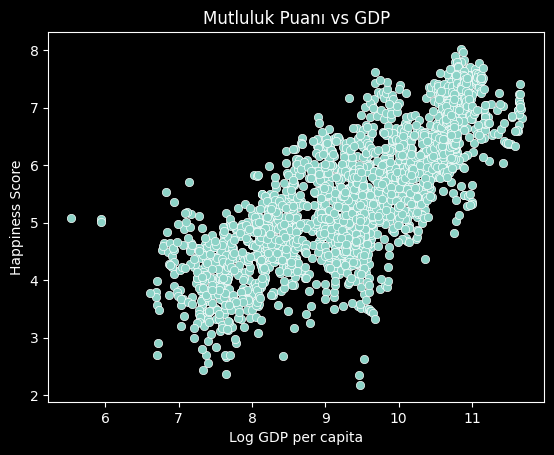

In [72]:
sns.scatterplot(x=df["Log GDP per capita"], y=df["Life Ladder"])
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness Score")
plt.title("Mutluluk Puanı vs GDP")
plt.show()

#### Yukarıda da görüldüğü üzere mutluluk puanı ile GDP arasında yüksek korelasyon bulunurken cömertlik ile mutluluk puanının korelasyonu daha düşük gözükmektedir

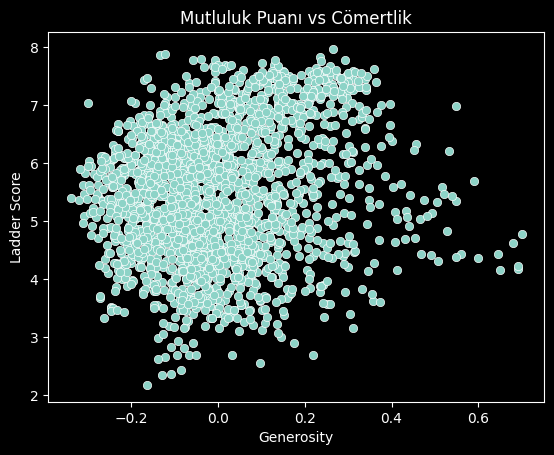

In [94]:
sns.scatterplot(x=df["Generosity"], y=df["Life Ladder"])
plt.xlabel("Generosity")
plt.ylabel("Ladder Score")
plt.title("Mutluluk Puanı vs Cömertlik")
plt.show()

#### Aşağıda nümerik değişkenlerin "Regional indicator" bazında dağılımını görselleştirmek için swarmplot çizilmiştir.

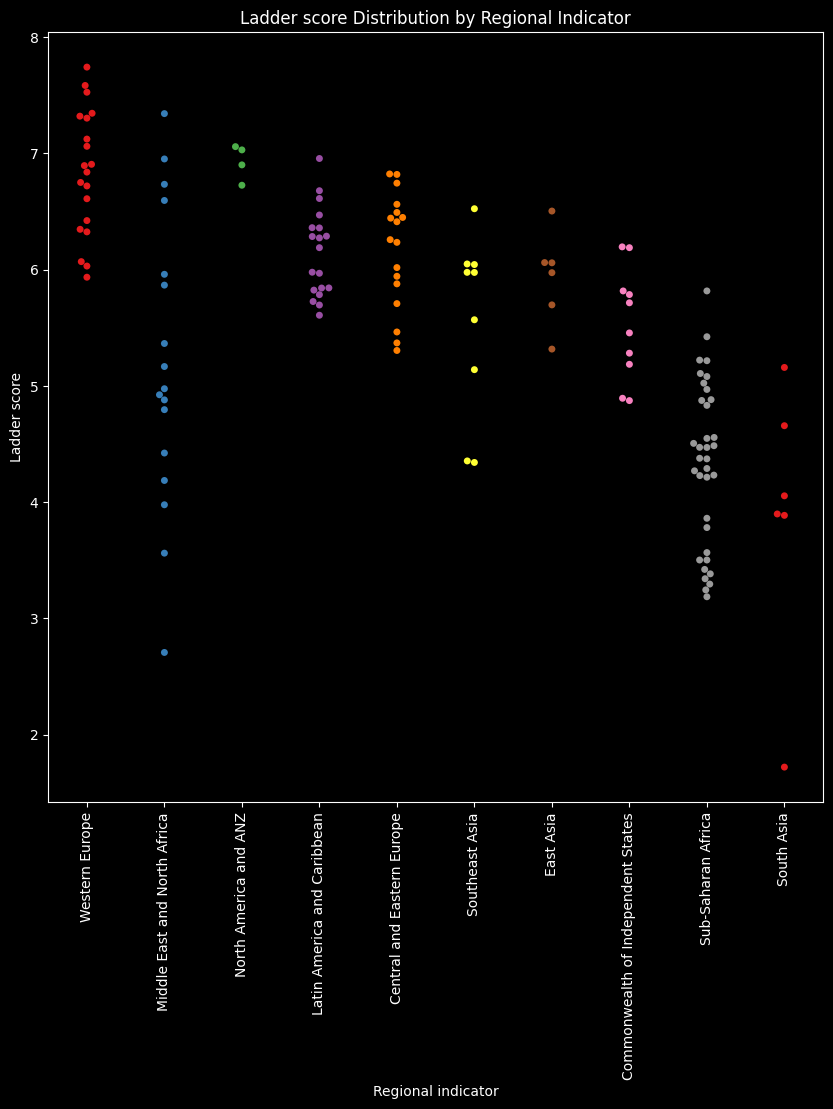

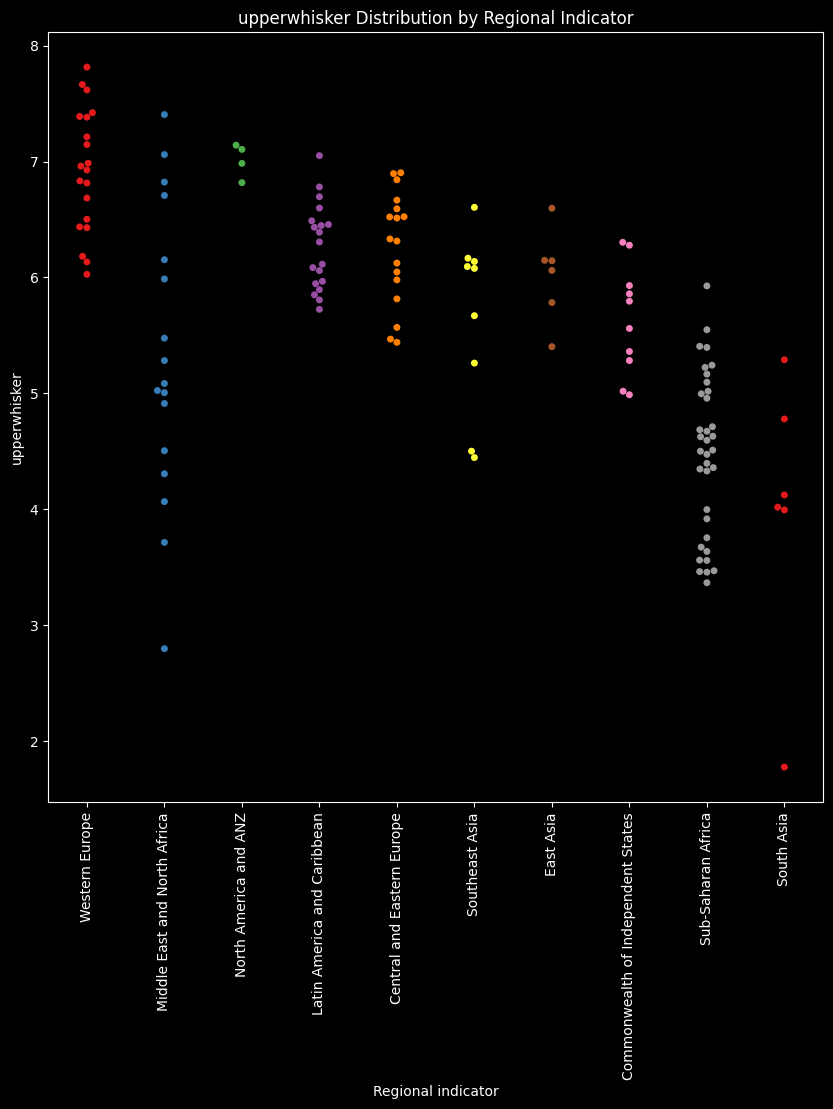

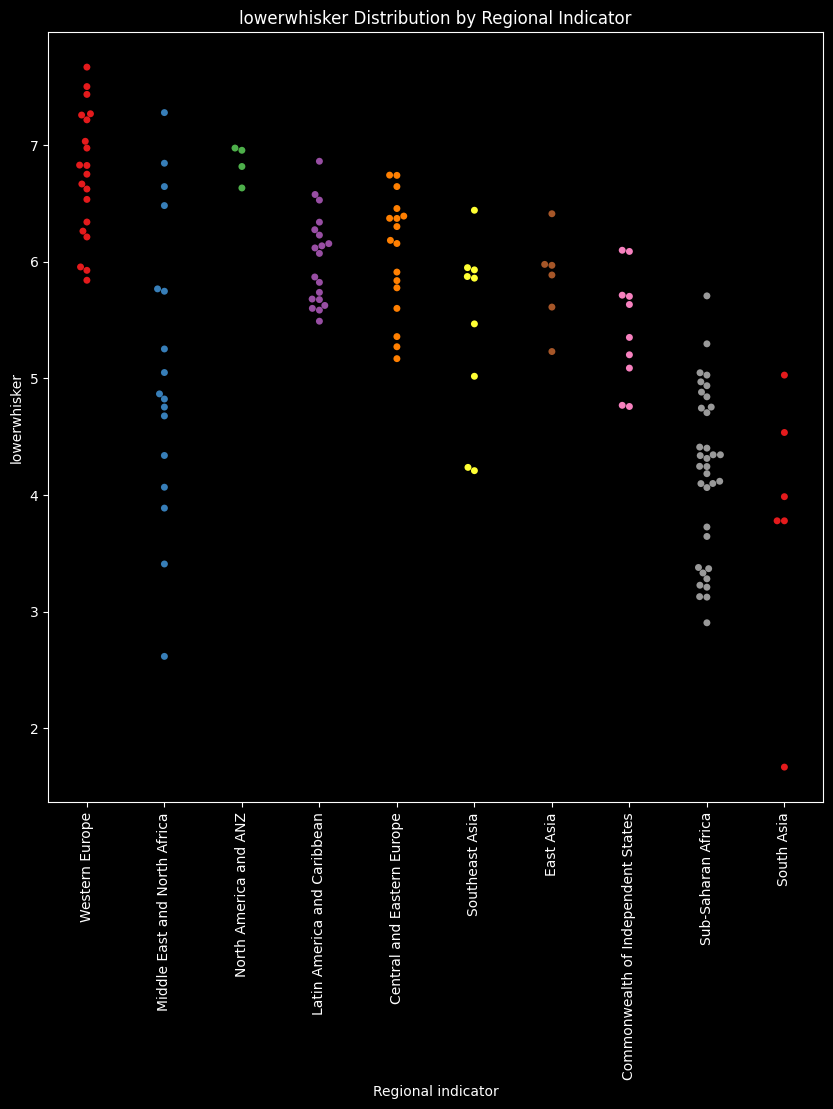

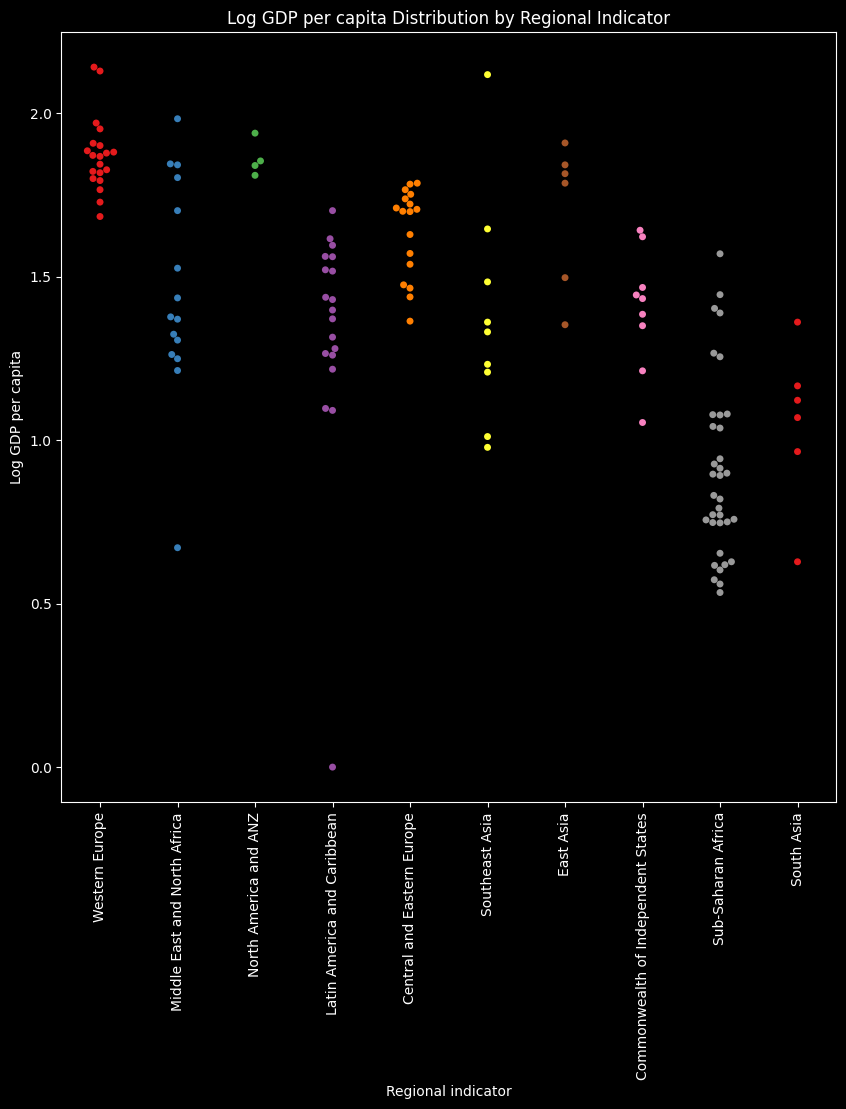

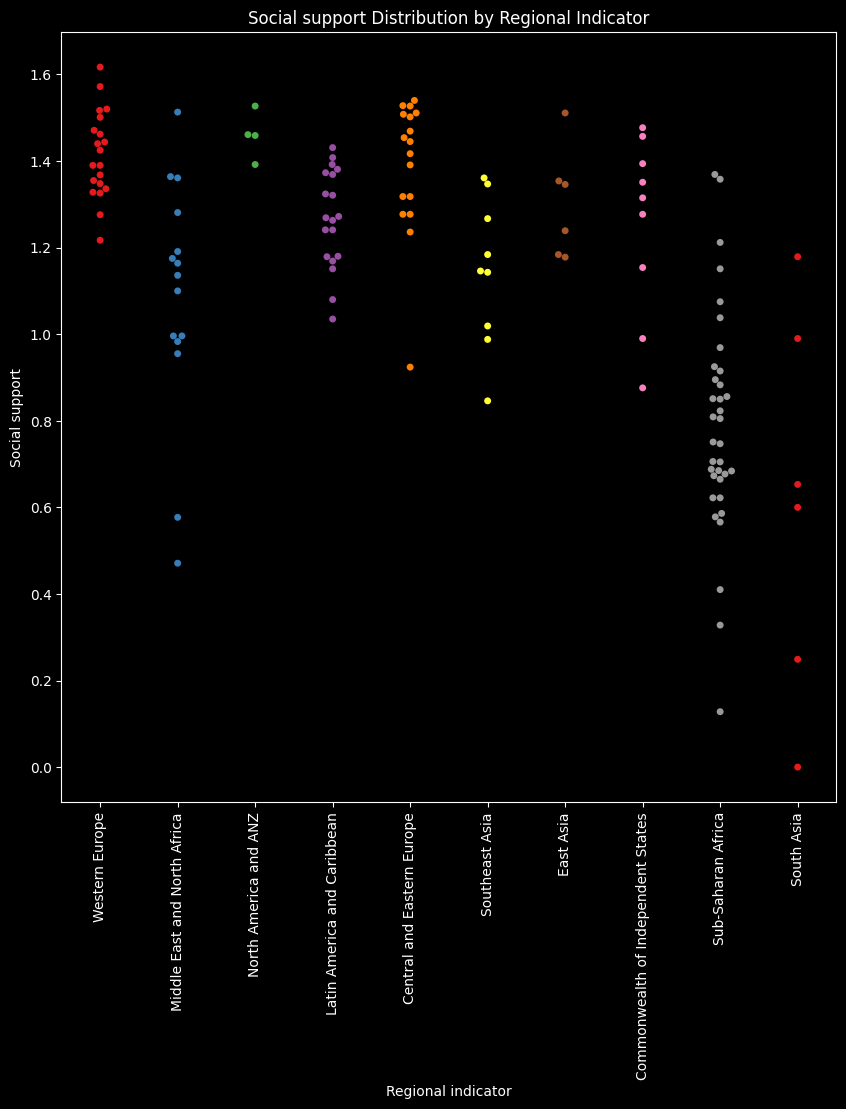

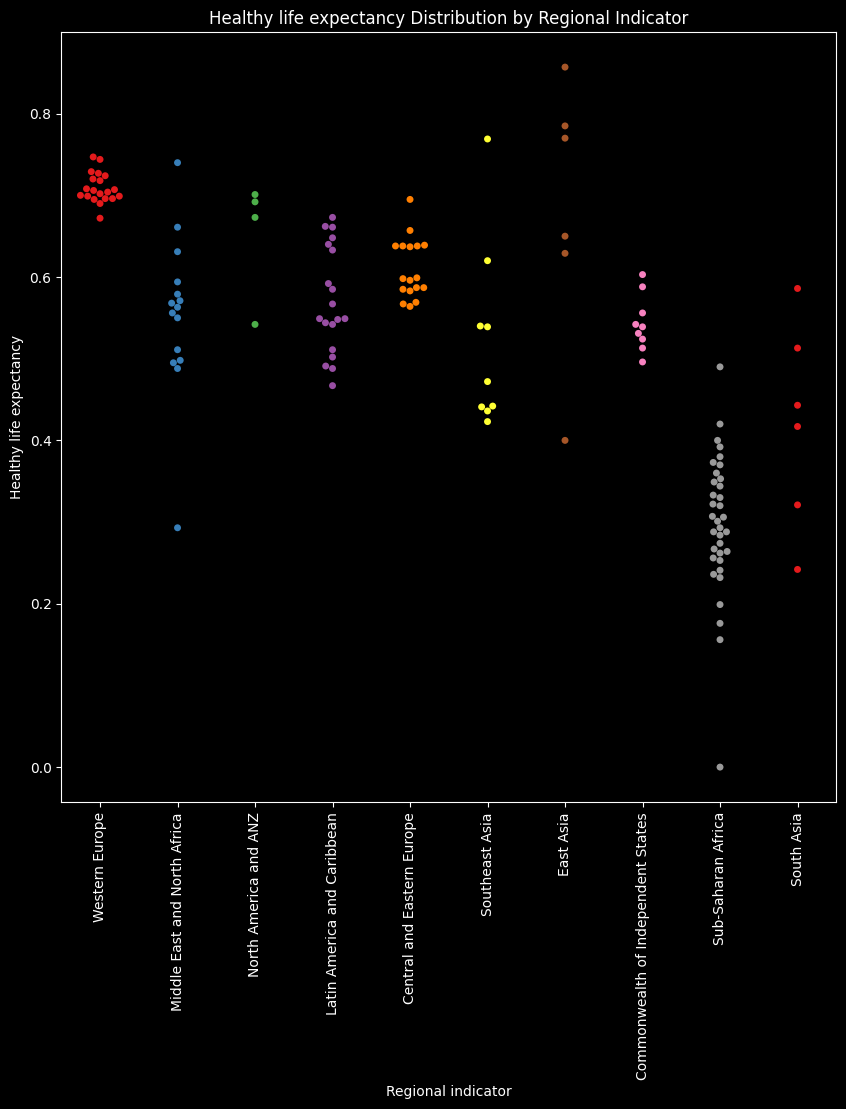

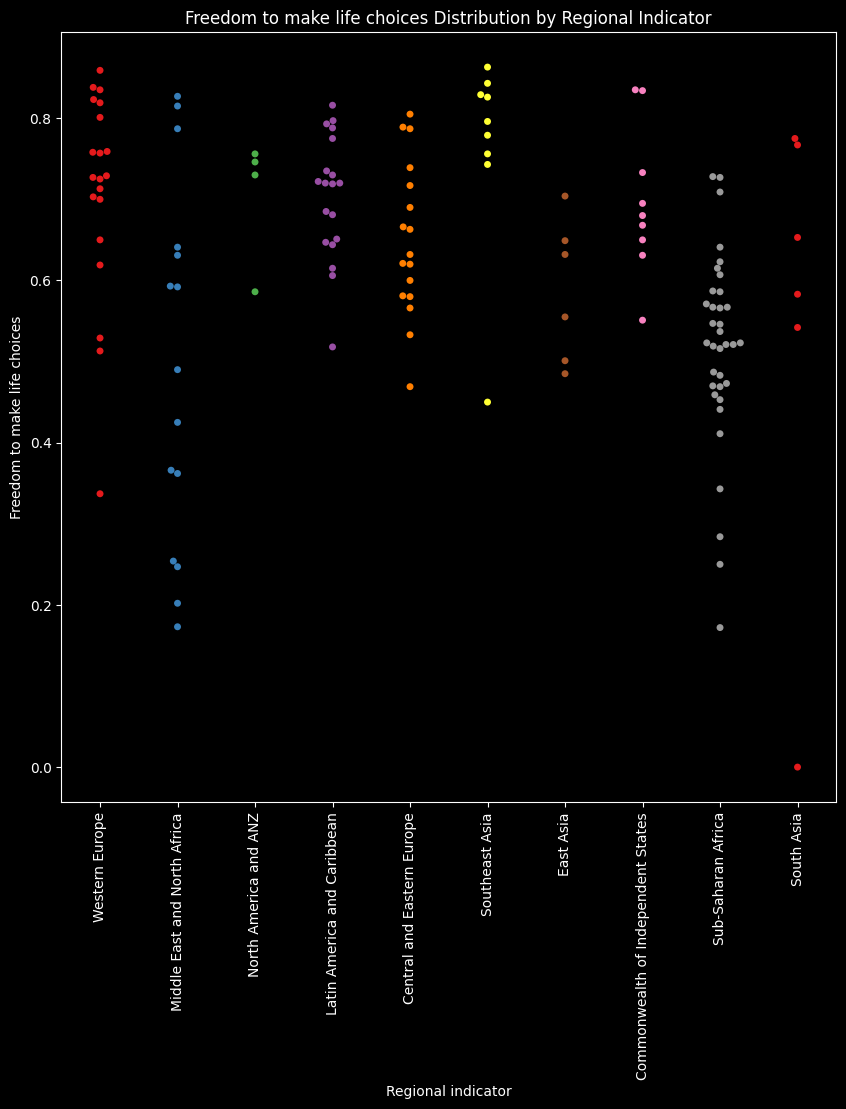

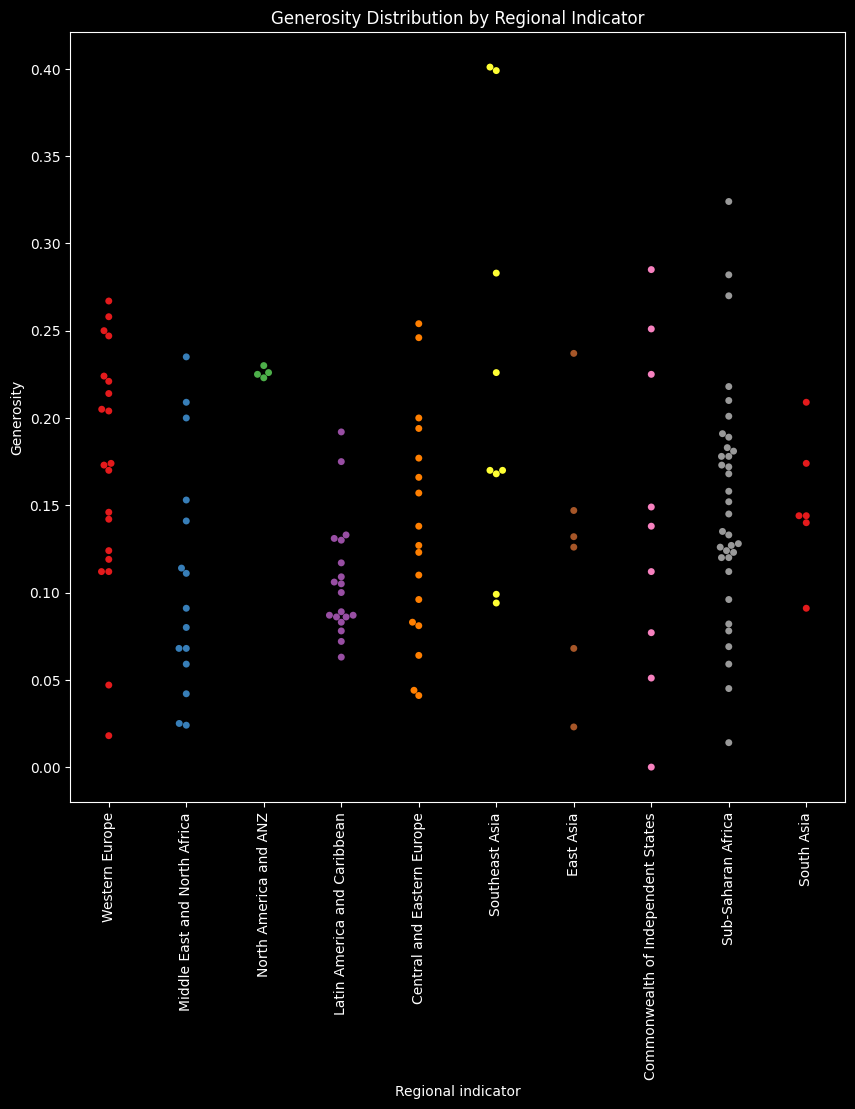

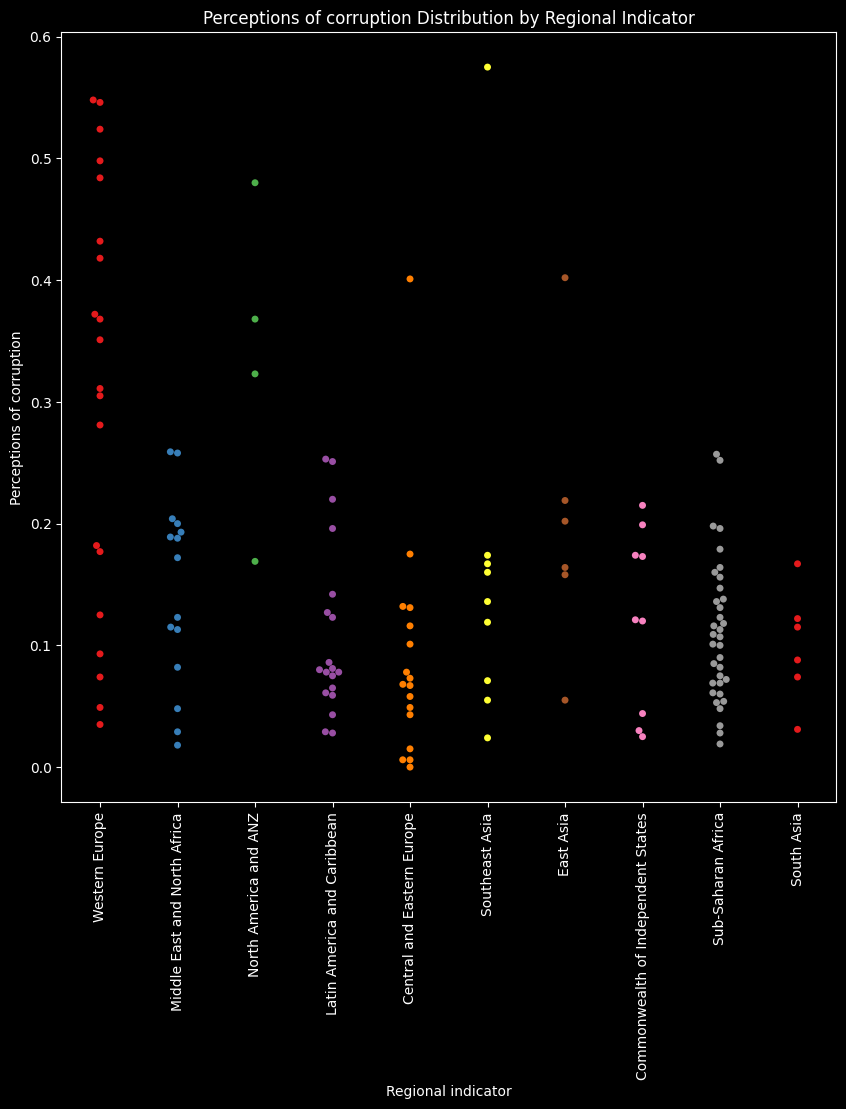

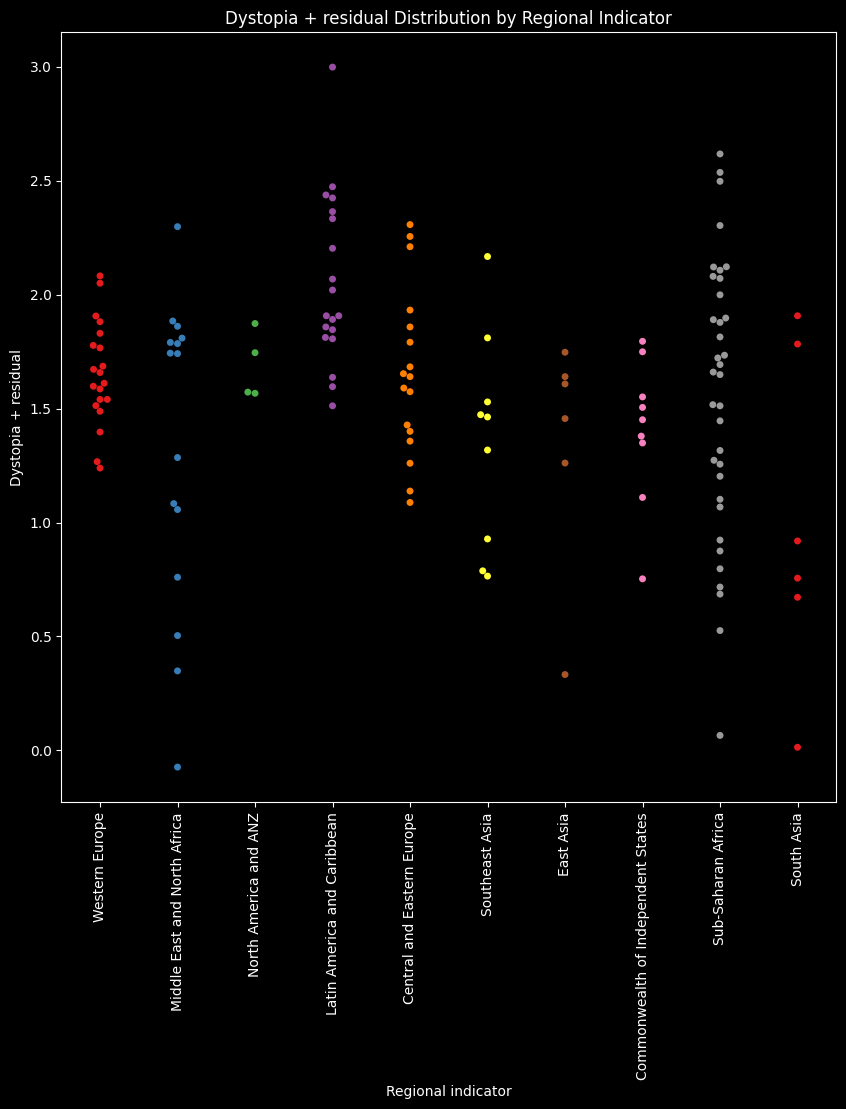

In [73]:
numVar2 = [
    "Ladder score",
    "upperwhisker",
    "lowerwhisker",
    "Log GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
    "Dystopia + residual"
]

def swarm_plot(vari):
    plt.figure(figsize=(10, 10))
    sns.swarmplot(data=df2, x="Regional indicator", y=vari, palette="Set1") 
    plt.title(f"{vari} Distribution by Regional Indicator")
    plt.xticks(rotation=90) 
    plt.show()

for i in numVar2:
    swarm_plot(i)    

### Df'deki bütün verilerin boxplotları. Yuvarlaklar outlierları göstermektedir.

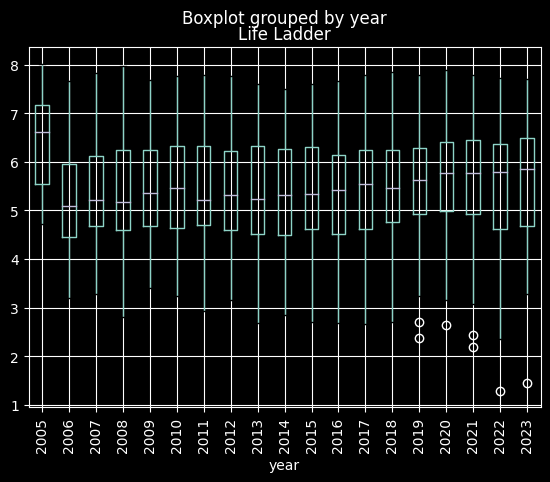

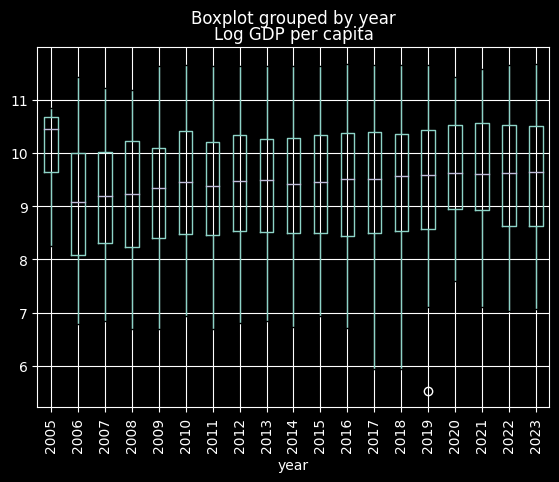

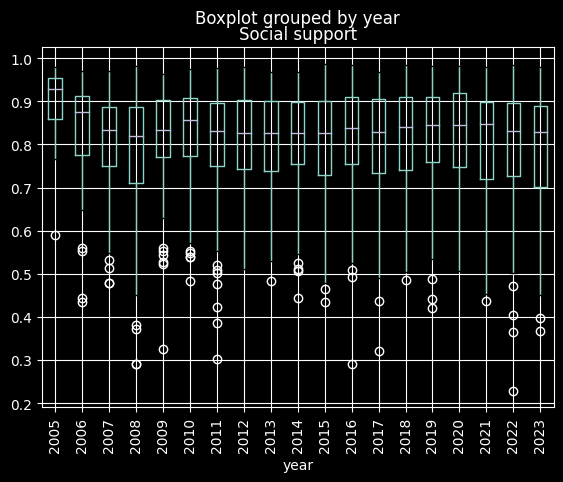

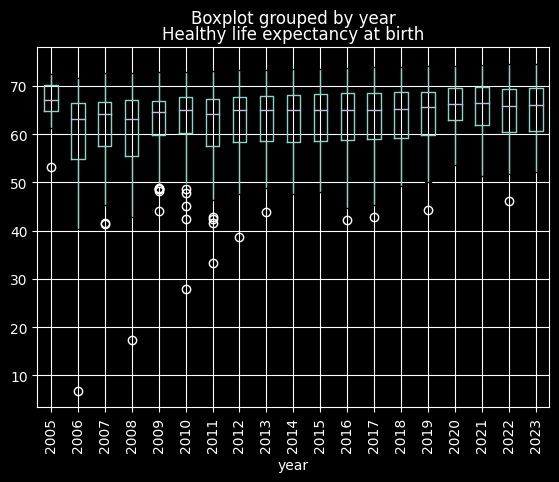

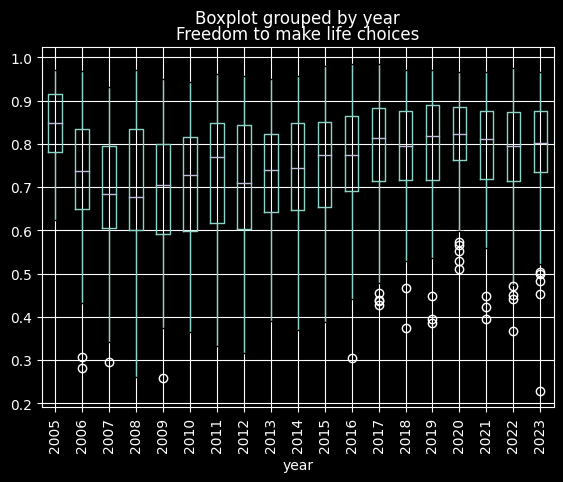

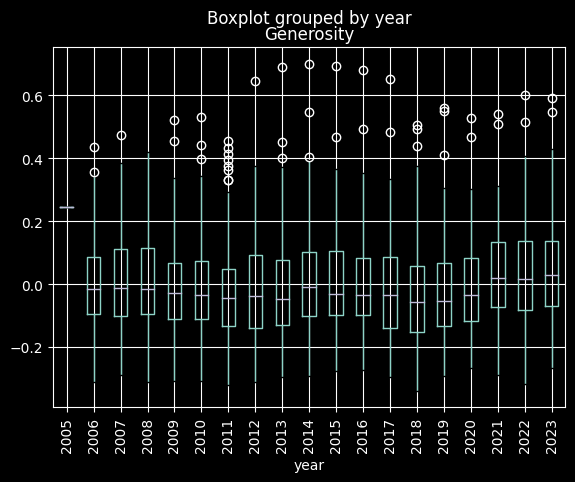

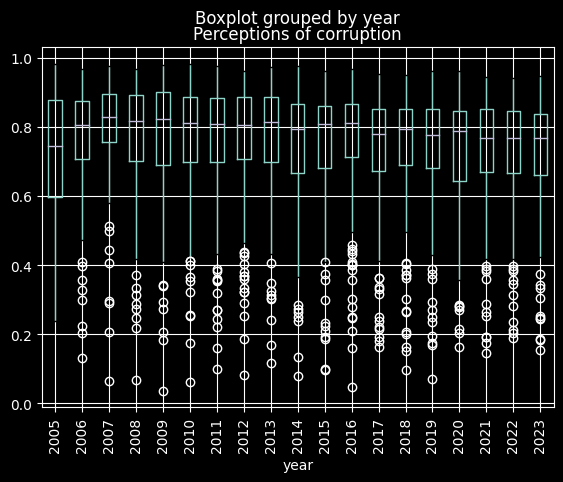

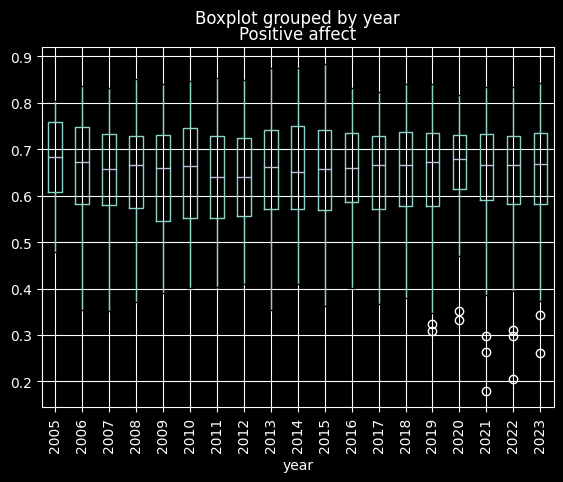

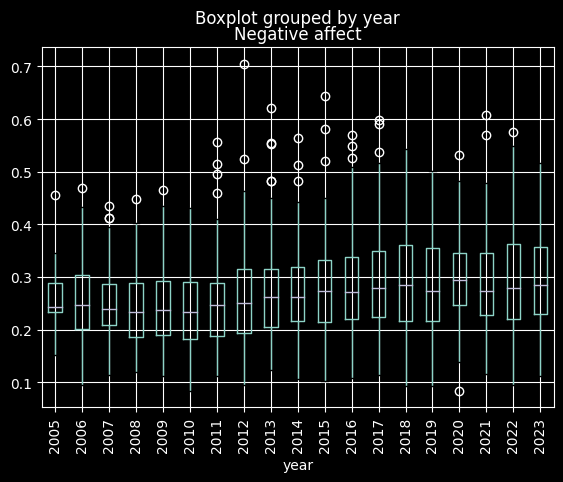

In [82]:
numVar = ["Life Ladder", "Log GDP per capita",
       "Social support", "Healthy life expectancy at birth",
       "Freedom to make life choices", "Generosity",
       "Perceptions of corruption", "Positive affect", "Negative affect"]

for b in numVar:
    df.boxplot(column=b, by="year", rot=90)
    plt.show()


## Correlation Map

### Creating new df by removing categorical data from dataframe

In [83]:
df_yeni = df.drop(columns=["Country name"])
df_yeni.corr()

year  Life Ladder  Log GDP per capita  \
year                              1.000000     0.046846            0.080104   
Life Ladder                       0.046846     1.000000            0.783556   
Log GDP per capita                0.080104     0.783556            1.000000   
Social support                   -0.044809     0.723691            0.685824   
Healthy life expectancy at birth  0.168026     0.714927            0.819326   
Freedom to make life choices      0.232974     0.538210            0.364816   
Generosity                        0.030864     0.177398           -0.000766   
Perceptions of corruption        -0.082136    -0.430485           -0.353893   
Positive affect                   0.013052     0.515283            0.230868   
Negative affect                   0.207642    -0.352412           -0.260689   

                                  Social support  \
year                                   -0.044809   
Life Ladder                             0.723691   
Log GDP per capita                      0.685824   
Social support                          1.000000   
Healthy life expectancy at birth        0.597758   
Freedom to make life choices            0.405035   
Generosity                              0.067333   
Perceptions of corruption              -0.222475   
Positive affect                         0.425301   
Negative affect                        -0.454717   

                                  Healthy life expectancy at birth  \
year                                                      0.168026   
Life Ladder                                               0.714927   
Log GDP per capita                                        0.819326   
Social support                                            0.597758   
Healthy life expectancy at birth                          1.000000   
Freedom to make life choices                              0.375745   
Generosity                                                0.015168   
Perceptions of corruption                                -0.303130   
Positive affect                                           0.217982   
Negative affect                                          -0.150330   

                                  Freedom to make life choices  Generosity  \
year                                                  0.232974    0.030864   
Life Ladder                                           0.538210    0.177398   
Log GDP per capita                                    0.364816   -0.000766   
Social support                                        0.405035    0.067333   
Healthy life expectancy at birth                      0.375745    0.015168   
Freedom to make life choices                          1.000000    0.321396   
Generosity                                            0.321396    1.000000   
Perceptions of corruption                            -0.466023   -0.270004   
Positive affect                                       0.578398    0.300608   
Negative affect                                      -0.278959   -0.071975   

                                  Perceptions of corruption  Positive affect  \
year                                              -0.082136         0.013052   
Life Ladder                                       -0.430485         0.515283   
Log GDP per capita                                -0.353893         0.230868   
Social support                                    -0.222475         0.425301   
Healthy life expectancy at birth                  -0.303130         0.217982   
Freedom to make life choices                      -0.466023         0.578398   
Generosity                                        -0.270004         0.300608   
Perceptions of corruption                          1.000000        -0.274208   
Positive affect                                   -0.274208         1.000000   
Negative affect                                    0.265555        -0.334451   

                                  Negative affect  
year                            

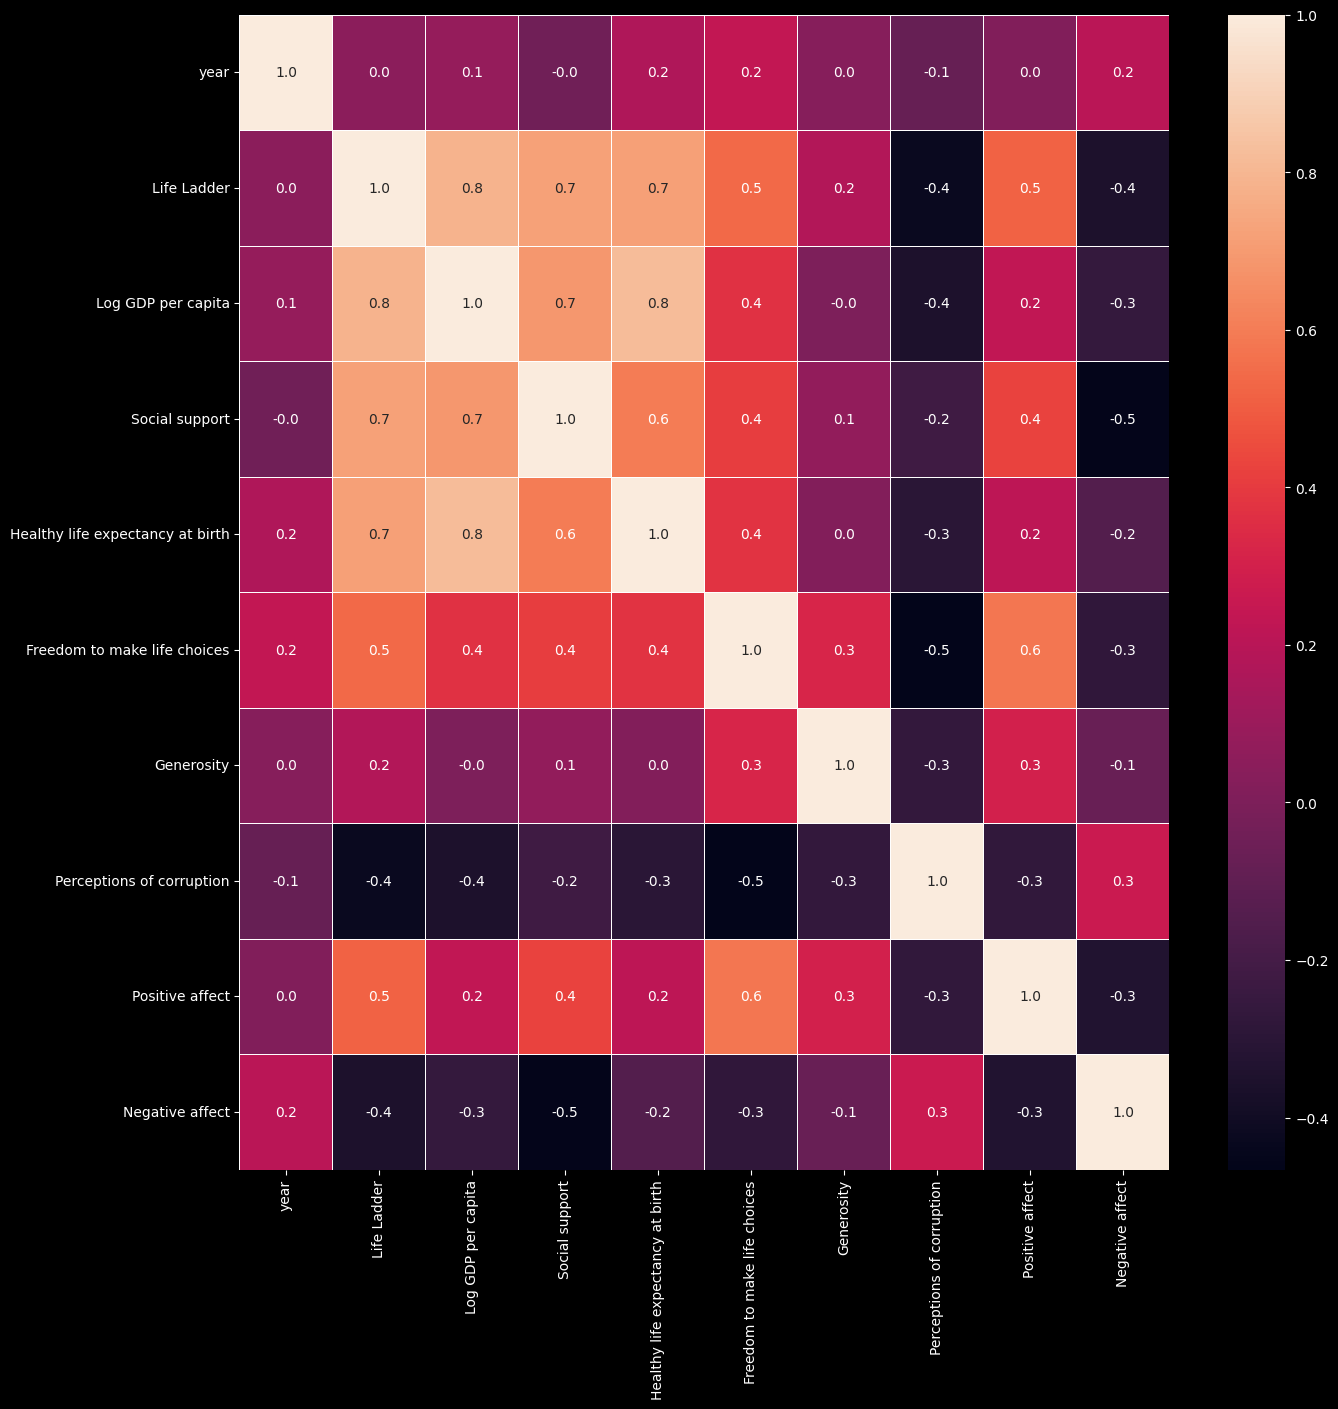

In [84]:
f,ax = plt.subplots(figsize = (15,15))

sns.heatmap(df_yeni.corr(),annot = True, linewidths=.5, fmt='.1f',ax = ax)
plt.show()

In [85]:
df_yeni.head()

year  Life Ladder  Log GDP per capita  Social support  \
0  2008        3.724               7.350           0.451   
1  2009        4.402               7.509           0.552   
2  2010        4.758               7.614           0.539   
3  2011        3.832               7.581           0.521   
4  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.414            0.258  
1                      0.850            0.481            0.237  
2                      0.707            0.517            0.275  
3                      0.731            0.480            0.267  
4                      0.776            0.614            0.268

### Çoklu karşılaştırma seti oluşturuldu.


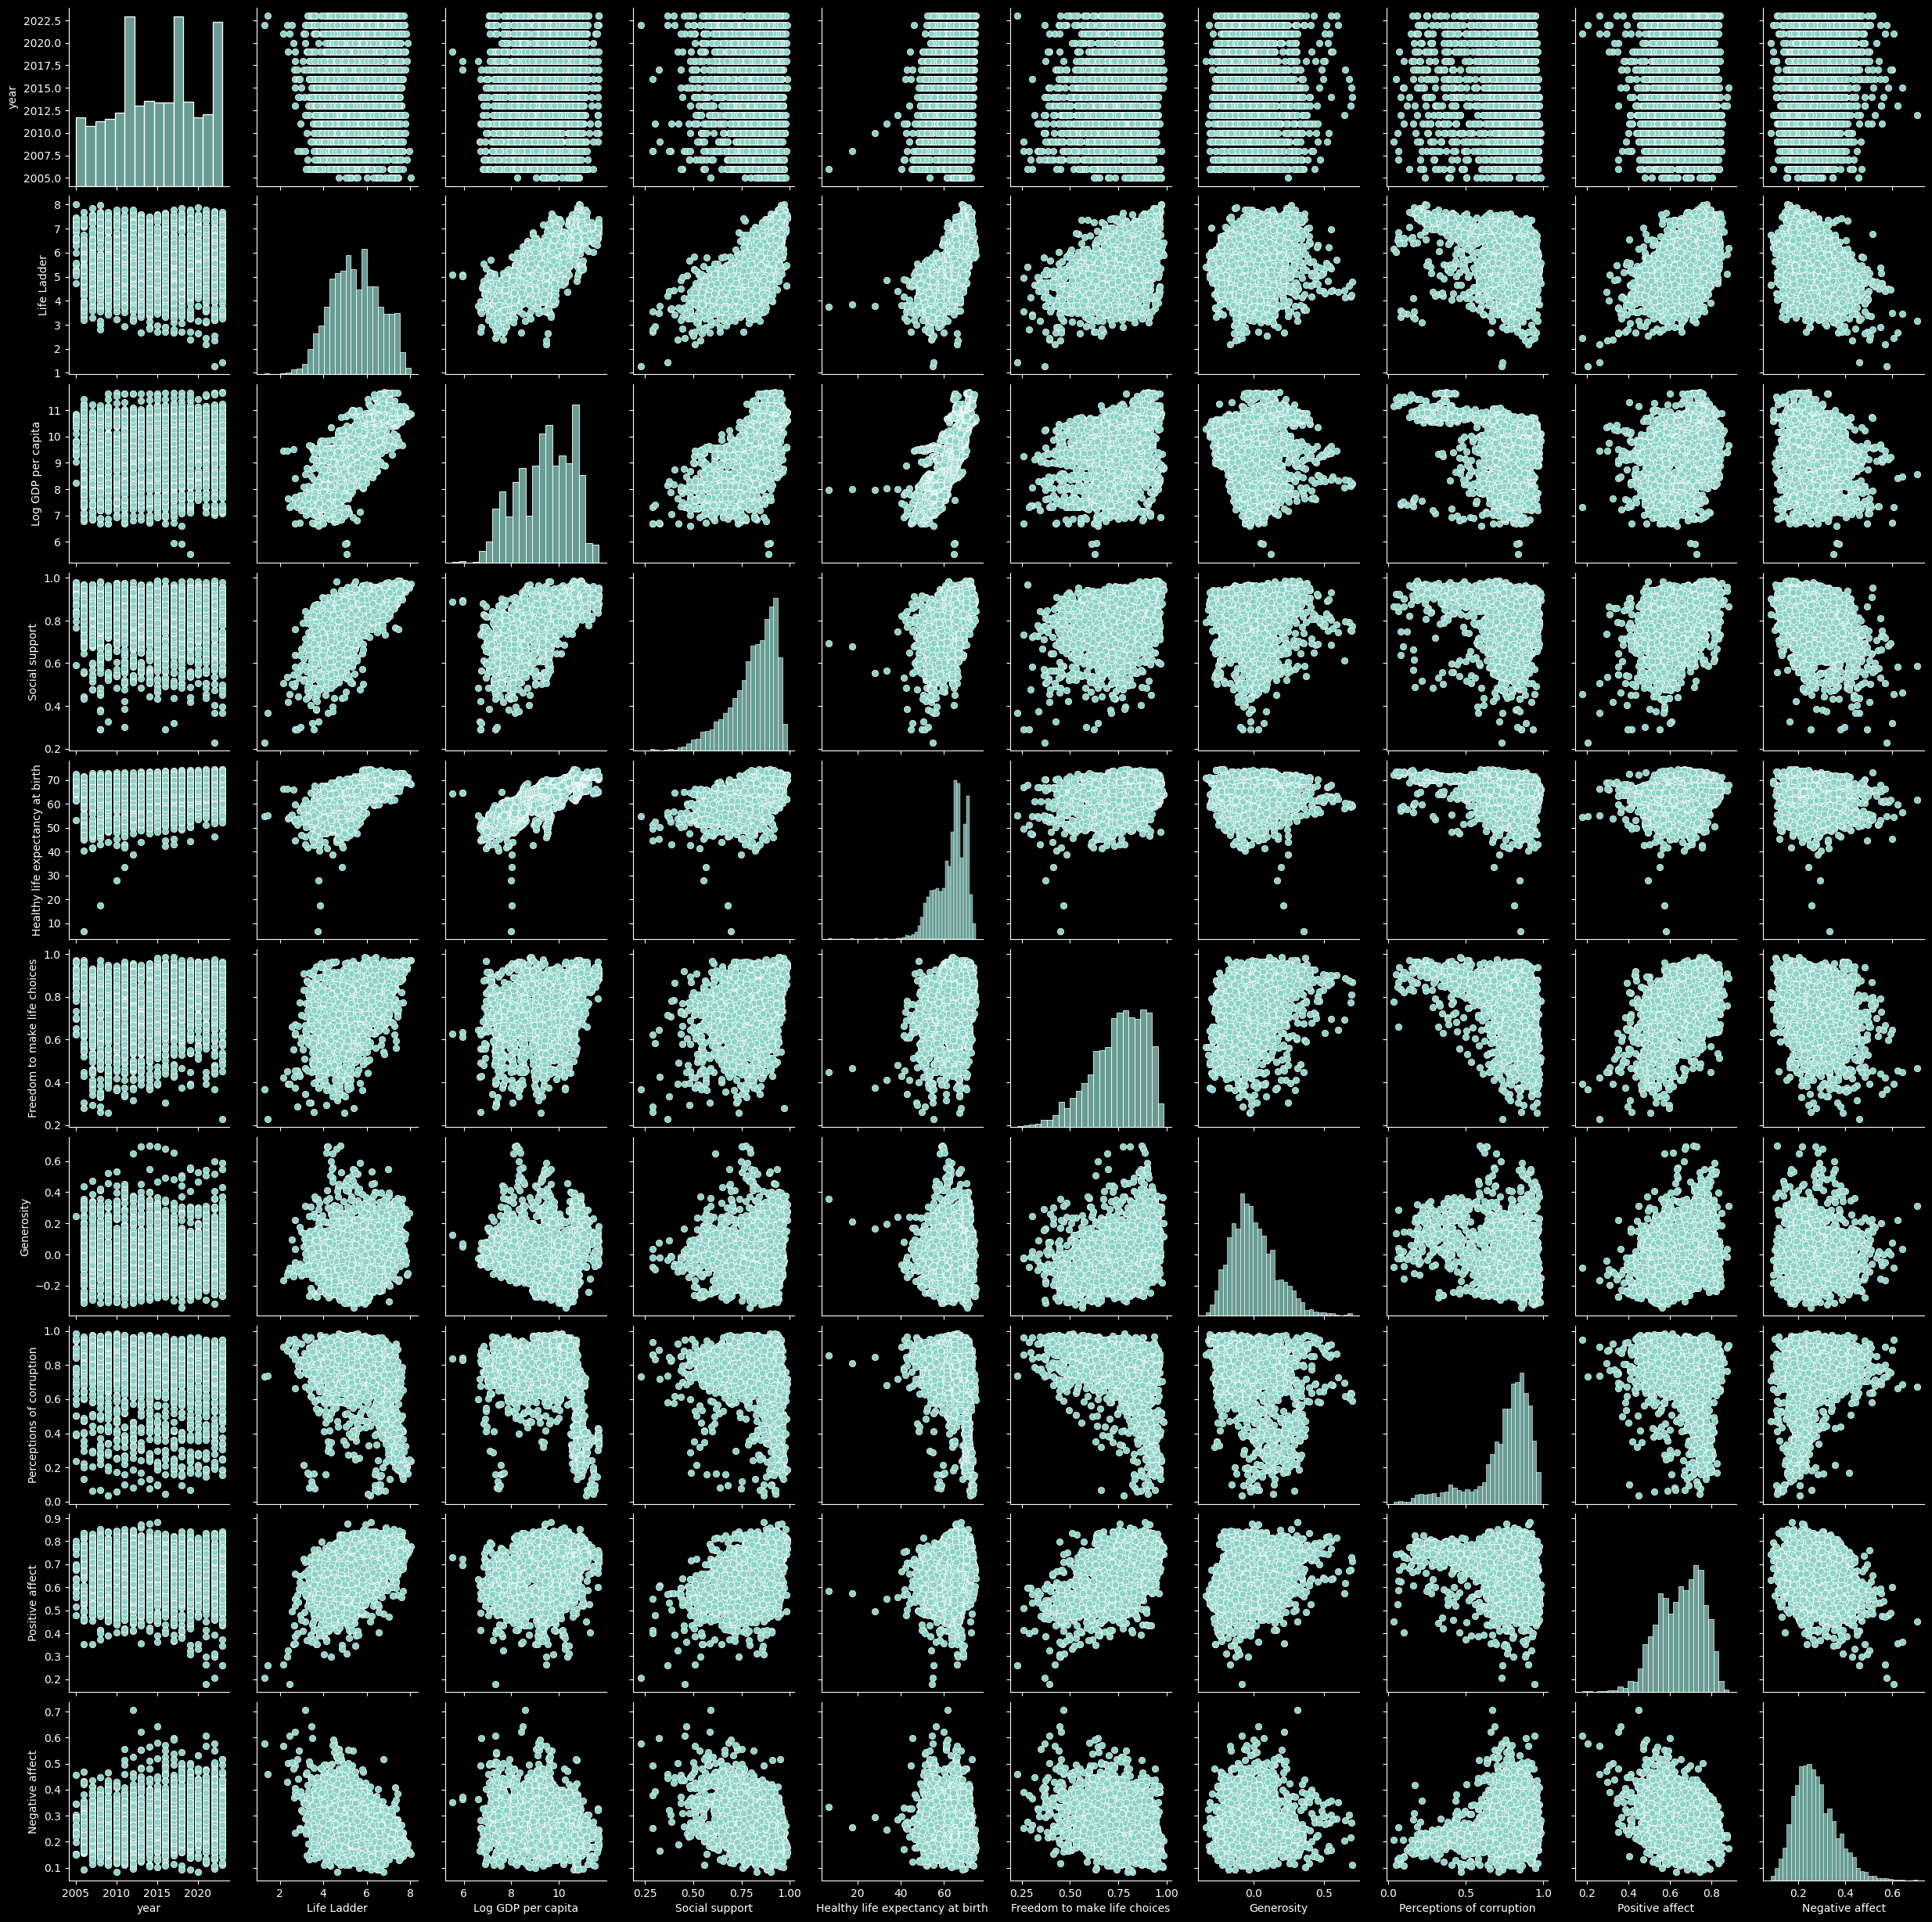

In [86]:
# Çoklu karşılaştırma seti oluşturuldu.
sns.pairplot(df)